# Time Series Project
**BITCOIN PRICE FORECASTING**

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-07-29 06:15:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-07-29 06:15:08 (7.43 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd

In [ ]:
coin_df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv")

In [ ]:
coin_df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [ ]:
len(coin_df)

2787

In [ ]:
coin_df_parsed_dates = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
coin_df_parsed_dates.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
coin_df_parsed_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


<Axes: xlabel='Date'>

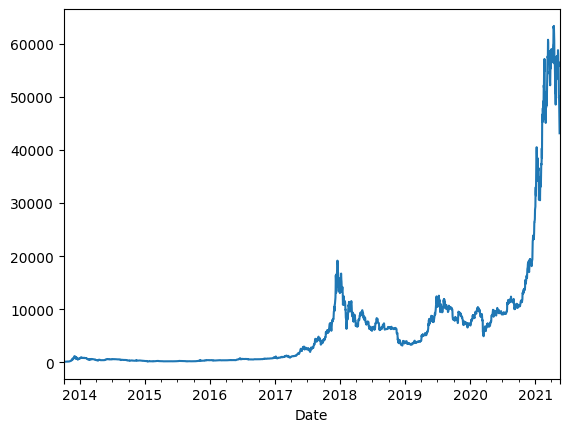

In [ ]:
import matplotlib.pyplot as plt

coin_df_parsed_dates["Closing Price (USD)"].plot()

**NOW WE SEE HOW WE CAN USE PYTHON'S COMMAND TO READ CSV FILES**

In [ ]:
import csv
from datetime import datetime

In [ ]:
date= []
coin_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_delimeter = csv.reader(f,delimiter=",")
  next(csv_delimeter)

  for line in csv_delimeter:
    date.append(datetime.strptime(line[1],"%Y-%m-%d"))
    coin_price.append(float(line[2]))

In [ ]:
date[:10] , coin_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0, 0.5, 'price')

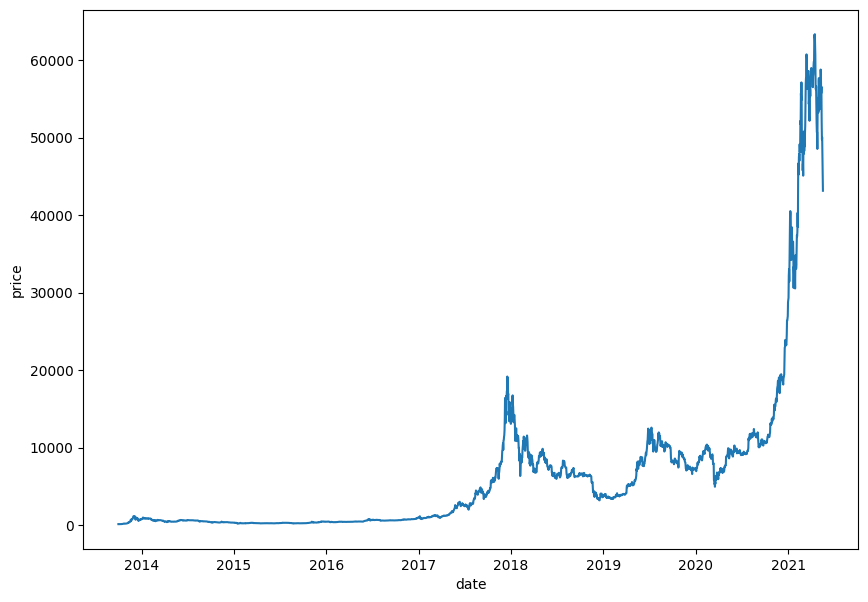

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(date,coin_price)
plt.xlabel("date")
plt.ylabel("price")

In [ ]:
bitcoin_price = pd.DataFrame( coin_df_parsed_dates["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"prices"})
bitcoin_price[:10]

,prices
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
2013-10-06,120.65533
2013-10-07,121.79500
2013-10-08,123.03300
2013-10-09,124.04900


In [ ]:
timestamps = bitcoin_price.index.to_numpy()
prices = bitcoin_price['prices'].to_numpy()

In [ ]:
time_S = tf.constant(timestamps)

NameError: ignored

*creating the train and test split in `wrong way`*

In [ ]:

from sklearn.model_selection import train_test_split

x_train , x_test , y_train,y_test = train_test_split(timestamps,prices,test_size=0.2)

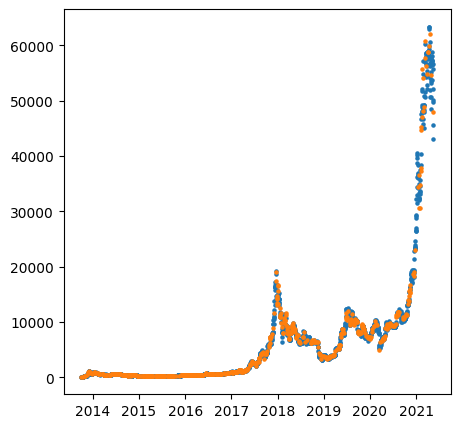

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x_train , y_train,s=5)
plt.scatter(x_test , y_test,s=5)

*Now we use the `correct method` to split train and test*

In [ ]:
split_size = int(0.8*len(coin_df))
split_size

2229

In [ ]:
x_train , y_train = timestamps[:split_size] , prices[:split_size]

x_test , y_test = timestamps[split_size:], prices[split_size:]

In [ ]:
len(coin_df)

2787

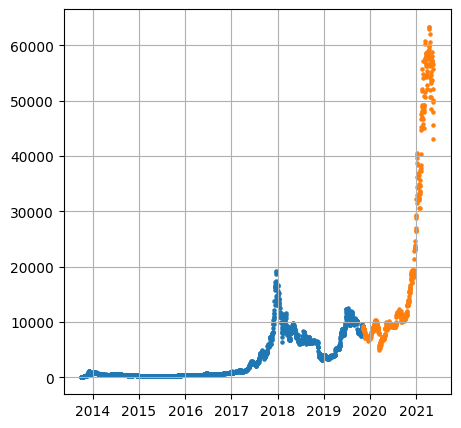

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x_train , y_train,s=5)
plt.scatter(x_test , y_test,s=5)
plt.grid(True)

**now we create a custom function to plot our time-series data**

In [ ]:

def plot_graph(timestamps,values,start=0,end=None,format=".",label=None):
  plt.plot(timestamps[start:end],values[start:end],format,label=label)
  plt.xlabel("DateTime")
  plt.ylabel("price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


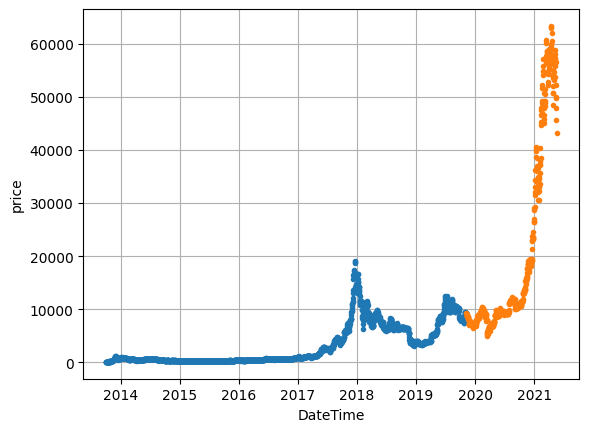

In [ ]:
plot_graph(x_train,y_train)
plot_graph(x_test,y_test)

# NOW WE CREATE VARIOUS MODEL AND EXPERIMENT WITH OUR TIME SERIES MODEL

**MODEL - 1 (BaseLine Model)**

In [ ]:
naive_model_1 = y_test[:-1]


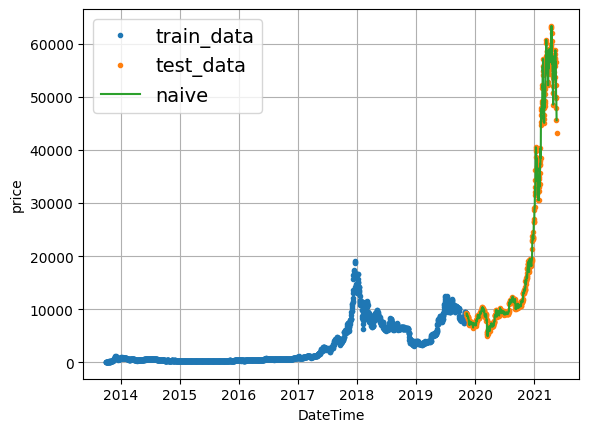

In [ ]:
plot_graph(x_train,y_train,label="train_data")
plot_graph(x_test,y_test,label="test_data")
plot_graph(x_test[1:],values=naive_model_1,format="-",label="naive");

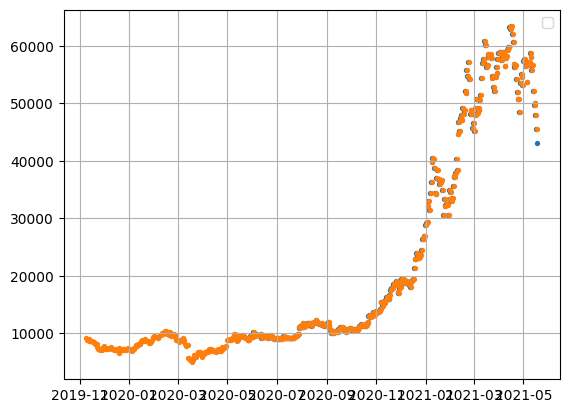

In [ ]:
#plt.scatter(x_train,y_train,s=8)
plt.scatter(x_test[200:],y_test[200:],s=8)
plt.scatter(x_test[1:],naive_model_1,s=8)
plt.legend()
plt.grid(True)

In [ ]:
import tensorflow as tf

def mean_absolute_scaled_error(y_true,y_preds):

   y_true = tf.cast(y_true,dtype=tf.float32)

   y_preds =tf.cast(y_preds,dtype=tf.float32)

   mae = tf.reduce_mean(tf.abs(y_true-y_preds))

   mae_naive = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

   return mae / mae_naive

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:],y_preds=naive_model_1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.99957>

In [ ]:
def calculate_error(y_true,y_preds):
  mae = tf.keras.losses.mae(y_true,y_preds)
  mse = tf.keras.losses.mse(y_true,y_preds)
  rmse = tf.sqrt(mse)
  mape = tf.keras.losses.MAPE(y_true,y_preds)
  mase = mean_absolute_scaled_error(y_true,y_preds)

  return {"mae":mae,"mse":mse,"root_mse":rmse,"mape":mape,"mean_scaled_error":mase}

In [ ]:

model_0_results=calculate_error(y_test[1:],naive_model_1)
model_0_results['mae'].numpy()

567.9802273457541

In [ ]:
print(f"we have of window of 7 dayas prices {prices[:7]}")
print(f"and we want to predict price on 8th day i.e {prices[8]}")

we have of window of 7 dayas prices [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]
and we want to predict price on 8th day i.e 124.049


In [ ]:

def window(x,horizon=1):
  return  x[:,:-horizon] , x[:,-horizon]

In [ ]:
window_size,horizon=window(tf.expand_dims(tf.range(7)+1,axis=0))

In [ ]:
window_size,horizon

(<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([7], dtype=int32)>)

In [ ]:

import numpy as np
r = tf.range(8)+1
r

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)>

In [ ]:

r[:-1] , r[-1]

(<tf.Tensor: shape=(7,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=8>)

In [ ]:
ws=np.expand_dims(np.arange(8),axis=0)
ws

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [ ]:
X = [['1','2','3','4','5','6','7'],
      ['2','3','4','5','6','7','8'],
      ]
len(prices)

2787

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1

X_step =np.expand_dims(np.arange(7),axis=0)
X_index =X_step+np.expand_dims(np.arange(len(prices)-WINDOW_SIZE+HORIZON-1),axis=0).transpose()
#(2780,7)
#type(coin_price), type(prices)
window_array=prices[X_index]
windows , horizons = window(window_array)
len(windows), len(horizons)

for i in range(4):
  print(f"windows -> {windows[i]} and horizons - > {horizons[i]}")

windows -> [123.65499 125.455   108.58483 118.67466 121.33866 120.65533] and horizons - > 121.795
windows -> [125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] and horizons - > 123.033
windows -> [108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] and horizons - > 124.049
windows -> [118.67466 121.33866 120.65533 121.795   123.033   124.049  ] and horizons - > 125.96116


In [ ]:

windows.shape,horizons.shape, windows[0].size

((2780, 6), (2780,), 6)

In [ ]:
def window_size(x,window_size=7,horizon=1):
  window_step = np.expand_dims(np.arange(window_size),axis=0)

  window_index = window_step + np.expand_dims(len(prices)-(window_size+horizon-1),axis=0).T

  windowed_array = x[window_index]

  windows , labels = window(windowed_array,horizon=1)

  return windows,labels




**now we split our window and horizon to train and test split**

In [ ]:
def splitting(w,h,test_size=0.2):
  split_size = int(len(w)*(1-test_size))

  train_window = windows[:split_size]
  train_horizon = horizons[:split_size]

  test_window = windows[split_size:]
  test_horizon = horizons[split_size:]

  return train_window , test_window , train_horizon,test_horizon


In [ ]:
train_windows , test_windows , train_horizons,test_horizons = splitting(windows,horizons)

In [ ]:

len(train_windows) , len(test_windows) , len(train_horizons),len(test_horizons) , test_horizons.shape

(2224, 556, 2224, 556, (556,))

In [ ]:
tf.keras.utils.timeseries_dataset_from_array(data=windows,targets=horizons,sequence_length=7)

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 6), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
prices_round = tf.round(prices)
len(prices_round)

2787

In [ ]:

import os
def checkpoint(model_name,file_path="model_check"):
 return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(file_path,model_name),save_best_only=True)



**MODEL 2**

*A SIMPLE DENSE MODEL*

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(HORIZON,activation="linear")

],name="model_2")


model_1.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.Adam(),metrics=["mae","mse"])


model_1.fit(train_windows,train_horizons,epochs=100,batch_size=128,validation_data=(test_windows,test_horizons),verbose=1,callbacks=[checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2434.9294 - mae: 2434.9294 - mse: 16481486.0000  

18/18 [==============================] - 7s 51ms/step - loss: 2434.9294 - mae: 2434.9294 - mse: 16481486.0000 - val_loss: 3725.5015 - val_mae: 3725.5015 - val_mse: 26361426.0000
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 416.2733 - mae: 416.2733 - mse: 615742.1250 

18/18 [==============================] - 1s 33ms/step - loss: 416.2733 - mae: 416.2733 - mse: 615742.1250 - val_loss: 994.6987 - val_mae: 994.6987 - val_mse: 2966615.0000
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 226.8331 - mae: 226.8331 - mse: 227638.6250 - val_loss: 1010.6526 - val_mae: 1010.6526 - val_mse: 3288857.7500
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 186.9818 - mae: 186.9818 - mse: 154499.3594

18/18 [==============================] - 1s 31ms/step - loss: 172.0190 - mae: 172.0190 - mse: 153555.6250 - val_loss: 911.3427 - val_mae: 911.3427 - val_mse: 2759176.7500
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 164.2856 - mae: 164.2856 - mse: 148400.0938 - val_loss: 916.0614 - val_mae: 916.0614 - val_mse: 2669265.5000
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 159.6315 - mae: 159.6315 - mse: 141046.8594 - val_loss: 912.8598 - val_mae: 912.8598 - val_mse: 2623441.5000
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 159.6298 - mae: 159.6298 - mse: 136032.2656

18/18 [==============================] - 1s 34ms/step - loss: 160.3855 - mae: 160.3855 - mse: 139291.2812 - val_loss: 868.7352 - val_mae: 868.7352 - val_mse: 2489682.5000
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 156.8271 - mae: 156.8271 - mse: 136005.9844

18/18 [==============================] - 1s 33ms/step - loss: 156.8271 - mae: 156.8271 - mse: 136005.9844 - val_loss: 855.6197 - val_mae: 855.6197 - val_mse: 2418677.5000
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 153.6122 - mae: 153.6122 - mse: 130978.2578

18/18 [==============================] - 1s 32ms/step - loss: 153.6122 - mae: 153.6122 - mse: 130978.2578 - val_loss: 843.0586 - val_mae: 843.0586 - val_mse: 2358499.5000
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 153.8632 - mae: 153.8632 - mse: 130804.0469

18/18 [==============================] - 1s 34ms/step - loss: 153.8632 - mae: 153.8632 - mse: 130804.0469 - val_loss: 839.1415 - val_mae: 839.1415 - val_mse: 2283299.5000
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 148.4036 - mae: 148.4036 - mse: 127640.6406

18/18 [==============================] - 1s 34ms/step - loss: 149.2341 - mae: 149.2341 - mse: 124529.4688 - val_loss: 823.0458 - val_mae: 823.0458 - val_mse: 2209701.2500
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 147.4786 - mae: 147.4786 - mse: 120916.0000 - val_loss: 825.4081 - val_mae: 825.4081 - val_mse: 2171683.5000
Epoch 13/100
18/18 [==============================] - ETA: 0s - loss: 152.9161 - mae: 152.9161 - mse: 121946.8906

18/18 [==============================] - 1s 46ms/step - loss: 152.9161 - mae: 152.9161 - mse: 121946.8906 - val_loss: 815.3216 - val_mae: 815.3216 - val_mse: 2203142.0000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 130.9206 - mae: 130.9206 - mse: 71185.4062

18/18 [==============================] - 1s 33ms/step - loss: 166.1149 - mae: 166.1149 - mse: 134381.1562 - val_loss: 793.4138 - val_mae: 793.4138 - val_mse: 2031886.2500
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 147.3361 - mae: 147.3361 - mse: 116440.7500 - val_loss: 814.9484 - val_mae: 814.9484 - val_mse: 2176546.2500
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 152.3051 - mae: 152.3051 - mse: 123145.8281 - val_loss: 861.1618 - val_mae: 861.1618 - val_mse: 2173011.2500
Epoch 17/100
18/18 [==============================] - ETA: 0s - loss: 143.3375 - mae: 143.3375 - mse: 111288.8203

18/18 [==============================] - 1s 34ms/step - loss: 143.3375 - mae: 143.3375 - mse: 111288.8203 - val_loss: 750.1810 - val_mae: 750.1810 - val_mse: 1861340.1250
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 135.1675 - mae: 135.1675 - mse: 104261.6641 - val_loss: 752.0638 - val_mae: 752.0638 - val_mse: 1825536.2500
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 133.2915 - mae: 133.2915 - mse: 100595.5078

18/18 [==============================] - 1s 33ms/step - loss: 133.2915 - mae: 133.2915 - mse: 100595.5078 - val_loss: 729.9658 - val_mae: 729.9658 - val_mse: 1766641.0000
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 131.1890 - mae: 131.1890 - mse: 99124.3516 

18/18 [==============================] - 1s 45ms/step - loss: 132.2410 - mae: 132.2410 - mse: 100141.2344 - val_loss: 719.2974 - val_mae: 719.2974 - val_mse: 1721695.2500
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 130.5189 - mae: 130.5189 - mse: 99511.8203

18/18 [==============================] - 1s 48ms/step - loss: 130.8779 - mae: 130.8779 - mse: 97959.7031 - val_loss: 718.9267 - val_mae: 718.9267 - val_mse: 1684493.8750
Epoch 22/100
11/18 [=================>............] - ETA: 0s - loss: 133.7036 - mae: 133.7036 - mse: 102186.4297

18/18 [==============================] - 1s 47ms/step - loss: 128.4979 - mae: 128.4979 - mse: 95677.8125 - val_loss: 709.2804 - val_mae: 709.2804 - val_mse: 1693333.2500
Epoch 23/100
18/18 [==============================] - 0s 8ms/step - loss: 132.9509 - mae: 132.9509 - mse: 95313.5234 - val_loss: 772.2278 - val_mae: 772.2278 - val_mse: 1800502.7500
Epoch 24/100
18/18 [==============================] - 0s 8ms/step - loss: 129.6931 - mae: 129.6931 - mse: 92417.4062 - val_loss: 792.0854 - val_mae: 792.0854 - val_mse: 1853461.7500
Epoch 25/100
13/18 [====================>.........] - ETA: 0s - loss: 132.0626 - mae: 132.0626 - mse: 97496.2969 

18/18 [==============================] - 1s 45ms/step - loss: 128.6927 - mae: 128.6927 - mse: 93404.4609 - val_loss: 682.0522 - val_mae: 682.0522 - val_mse: 1548492.8750
Epoch 26/100
18/18 [==============================] - 0s 8ms/step - loss: 124.4362 - mae: 124.4362 - mse: 89645.3125 - val_loss: 709.7944 - val_mae: 709.7944 - val_mse: 1601646.7500
Epoch 27/100
18/18 [==============================] - 0s 8ms/step - loss: 125.4763 - mae: 125.4763 - mse: 89781.2812 - val_loss: 687.4439 - val_mae: 687.4439 - val_mse: 1538039.0000
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 128.1733 - mae: 128.1733 - mse: 92729.9609 

18/18 [==============================] - 1s 33ms/step - loss: 126.5156 - mae: 126.5156 - mse: 89712.1406 - val_loss: 668.3531 - val_mae: 668.3531 - val_mse: 1524382.8750
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 122.3965 - mae: 122.3965 - mse: 138915.4219

18/18 [==============================] - 1s 30ms/step - loss: 122.1233 - mae: 122.1233 - mse: 86574.5781 - val_loss: 659.4492 - val_mae: 659.4492 - val_mse: 1460182.7500
Epoch 30/100
18/18 [==============================] - ETA: 0s - loss: 128.9561 - mae: 128.9561 - mse: 87950.1875

18/18 [==============================] - 1s 31ms/step - loss: 128.9561 - mae: 128.9561 - mse: 87950.1875 - val_loss: 655.6867 - val_mae: 655.6867 - val_mse: 1444986.7500
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 137.2294 - mae: 137.2294 - mse: 106197.6719

18/18 [==============================] - 1s 31ms/step - loss: 135.0566 - mae: 135.0566 - mse: 97834.5000 - val_loss: 645.5255 - val_mae: 645.5255 - val_mse: 1421259.7500
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 141.5451 - mae: 141.5451 - mse: 139802.2656

18/18 [==============================] - 1s 33ms/step - loss: 124.3122 - mae: 124.3122 - mse: 89338.1953 - val_loss: 644.0267 - val_mae: 644.0267 - val_mse: 1436097.3750
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 118.8531 - mae: 118.8531 - mse: 82740.5312

18/18 [==============================] - 1s 32ms/step - loss: 118.8531 - mae: 118.8531 - mse: 82740.5312 - val_loss: 637.4578 - val_mae: 637.4578 - val_mse: 1390877.1250
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 121.1813 - mae: 121.1813 - mse: 83756.5234 - val_loss: 661.5203 - val_mae: 661.5203 - val_mse: 1437060.7500
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 119.8078 - mae: 119.8078 - mse: 83073.8750 - val_loss: 727.8159 - val_mae: 727.8159 - val_mse: 1598694.5000
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 122.7952 - mae: 122.7952 - mse: 82095.3672 - val_loss: 705.5139 - val_mae: 705.5139 - val_mse: 1535558.2500
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 120.8176 - mae: 120.8176 - mse: 83281.4609 - val_loss: 727.7100 - val_mae: 727.7100 - val_mse: 1592337.2500
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 136.2048 - mae: 136.2048 - m

18/18 [==============================] - 1s 32ms/step - loss: 135.5754 - mae: 135.5754 - mse: 96210.3438 - val_loss: 619.4180 - val_mae: 619.4180 - val_mse: 1345743.8750
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 119.6675 - mae: 119.6675 - mse: 82464.9844 - val_loss: 620.8729 - val_mae: 620.8729 - val_mse: 1347458.2500
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 116.6476 - mae: 116.6476 - mse: 80489.6875 - val_loss: 642.0884 - val_mae: 642.0884 - val_mse: 1403333.2500
Epoch 43/100
13/18 [====================>.........] - ETA: 0s - loss: 125.9322 - mae: 125.9322 - mse: 88866.0391

18/18 [==============================] - 1s 49ms/step - loss: 124.5912 - mae: 124.5912 - mse: 86672.2812 - val_loss: 609.4212 - val_mae: 609.4212 - val_mse: 1305439.1250
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 121.9022 - mae: 121.9022 - mse: 83326.5156 - val_loss: 650.1010 - val_mae: 650.1010 - val_mse: 1379136.0000
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 116.5800 - mae: 116.5800 - mse: 79280.8203 - val_loss: 694.5813 - val_mae: 694.5813 - val_mse: 1488743.2500
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 117.3543 - mae: 117.3543 - mse: 80350.9219 - val_loss: 708.4008 - val_mae: 708.4008 - val_mse: 1588694.0000
Epoch 47/100
17/18 [===========================>..] - ETA: 0s - loss: 120.3579 - mae: 120.3579 - mse: 83349.5625 

18/18 [==============================] - 1s 32ms/step - loss: 119.3995 - mae: 119.3995 - mse: 82105.1172 - val_loss: 602.7123 - val_mae: 602.7123 - val_mse: 1281878.5000
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4556 - mae: 113.4556 - mse: 78011.0625 - val_loss: 618.0071 - val_mae: 618.0071 - val_mse: 1304508.7500
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0053 - mae: 114.0053 - mse: 77914.1797 - val_loss: 604.1771 - val_mae: 604.1771 - val_mse: 1290688.0000
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 125.2788 - mae: 125.2788 - mse: 88403.7500

18/18 [==============================] - 1s 32ms/step - loss: 113.6209 - mae: 113.6209 - mse: 77194.6719 - val_loss: 600.5522 - val_mae: 600.5522 - val_mse: 1268538.8750
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9892 - mae: 112.9892 - mse: 76341.4375 - val_loss: 650.1293 - val_mae: 650.1293 - val_mse: 1366339.5000
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 124.2209 - mae: 124.2209 - mse: 80390.7578

18/18 [==============================] - 1s 31ms/step - loss: 114.1159 - mae: 114.1159 - mse: 76366.0703 - val_loss: 594.2852 - val_mae: 594.2852 - val_mse: 1257174.6250
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9623 - mae: 112.9623 - mse: 76135.6797 - val_loss: 611.9716 - val_mae: 611.9716 - val_mse: 1281587.8750
Epoch 54/100
16/18 [=========================>....] - ETA: 0s - loss: 113.9738 - mae: 113.9738 - mse: 78670.6328

18/18 [==============================] - 1s 31ms/step - loss: 112.6194 - mae: 112.6194 - mse: 77325.3750 - val_loss: 591.4719 - val_mae: 591.4719 - val_mse: 1248218.5000
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 113.2367 - mae: 113.2367 - mse: 75851.0625 - val_loss: 597.7129 - val_mae: 597.7129 - val_mse: 1252140.2500
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4403 - mae: 112.4403 - mse: 76575.3594 - val_loss: 595.1389 - val_mae: 595.1389 - val_mse: 1246189.3750
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6131 - mae: 112.6131 - mse: 75907.4688 - val_loss: 599.2872 - val_mae: 599.2872 - val_mse: 1251596.3750
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 112.9383 - mae: 112.9383 - mse: 76139.5078 - val_loss: 657.9604 - val_mae: 657.9604 - val_mse: 1409644.6250
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3101 - mae: 115.3101 - m

18/18 [==============================] - 1s 32ms/step - loss: 114.3897 - mae: 114.3897 - mse: 77238.7188 - val_loss: 587.8387 - val_mae: 587.8387 - val_mse: 1221469.0000
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 113.2617 - mae: 113.2617 - mse: 74915.6719 

18/18 [==============================] - 1s 45ms/step - loss: 113.2617 - mae: 113.2617 - mse: 74915.6719 - val_loss: 580.1979 - val_mae: 580.1979 - val_mse: 1213410.3750
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 110.7539 - mae: 110.7539 - mse: 72826.0859 - val_loss: 594.0120 - val_mae: 594.0120 - val_mse: 1228807.3750
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 109.1292 - mae: 109.1292 - mse: 73082.5469 - val_loss: 588.3988 - val_mae: 588.3988 - val_mse: 1230259.6250
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 110.3566 - mae: 110.3566 - mse: 72508.5312 - val_loss: 647.9781 - val_mae: 647.9781 - val_mse: 1365592.0000
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 113.2864 - mae: 113.2864 - mse: 75520.0000 - val_loss: 600.6285 - val_mae: 600.6285 - val_mse: 1237399.7500
Epoch 70/100
18/18 [==============================] - 0s 8ms/step - loss: 123.6004 - mae: 123.6004 - m

18/18 [==============================] - 1s 47ms/step - loss: 112.3443 - mae: 112.3443 - mse: 74382.6250 - val_loss: 574.6055 - val_mae: 574.6055 - val_mse: 1198905.7500
Epoch 73/100
18/18 [==============================] - 0s 8ms/step - loss: 109.0710 - mae: 109.0710 - mse: 72626.0781 - val_loss: 595.9640 - val_mae: 595.9640 - val_mse: 1225626.8750
Epoch 74/100
18/18 [==============================] - 0s 8ms/step - loss: 109.3207 - mae: 109.3207 - mse: 71793.0234 - val_loss: 600.3732 - val_mae: 600.3732 - val_mse: 1233525.8750
Epoch 75/100
18/18 [==============================] - 0s 8ms/step - loss: 109.7916 - mae: 109.7916 - mse: 73905.7891 - val_loss: 604.4255 - val_mae: 604.4255 - val_mse: 1241182.8750
Epoch 76/100
18/18 [==============================] - 0s 8ms/step - loss: 111.0763 - mae: 111.0763 - mse: 71788.1250 - val_loss: 579.5832 - val_mae: 579.5832 - val_mse: 1204806.8750
Epoch 77/100
18/18 [==============================] - 0s 8ms/step - loss: 117.6137 - mae: 117.6137 - m

18/18 [==============================] - 1s 37ms/step - loss: 110.9963 - mae: 110.9963 - mse: 73334.9219 - val_loss: 569.6382 - val_mae: 569.6382 - val_mse: 1181052.8750
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 114.2235 - mae: 114.2235 - mse: 73610.2578 - val_loss: 592.9703 - val_mae: 592.9703 - val_mse: 1213140.7500
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 108.6555 - mae: 108.6555 - mse: 72255.2422 - val_loss: 638.6246 - val_mae: 638.6246 - val_mse: 1314616.3750
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 117.1739 - mae: 117.1739 - mse: 75657.0156 - val_loss: 617.9656 - val_mae: 617.9656 - val_mse: 1277577.6250
Epoch 85/100
 1/18 [>.............................] - ETA: 0s - loss: 130.1179 - mae: 130.1179 - mse: 73227.1562

18/18 [==============================] - 1s 31ms/step - loss: 118.7958 - mae: 118.7958 - mse: 78403.7734 - val_loss: 568.4009 - val_mae: 568.4009 - val_mse: 1176332.0000
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1539 - mae: 107.1539 - mse: 70594.9531 - val_loss: 575.3130 - val_mae: 575.3130 - val_mse: 1180665.6250
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 108.8730 - mae: 108.8730 - mse: 72023.4375 - val_loss: 580.0084 - val_mae: 580.0084 - val_mse: 1197735.8750
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6568 - mae: 109.6568 - mse: 72452.7812 - val_loss: 636.1857 - val_mae: 636.1857 - val_mse: 1316682.8750
Epoch 89/100
18/18 [==============================] - 0s 8ms/step - loss: 111.7626 - mae: 111.7626 - mse: 71886.1250 - val_loss: 583.9733 - val_mae: 583.9733 - val_mse: 1204461.5000
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7460 - mae: 109.7460 - m

18/18 [==============================] - 1s 31ms/step - loss: 108.1251 - mae: 108.1251 - mse: 71995.5078 - val_loss: 564.9989 - val_mae: 564.9989 - val_mse: 1162995.3750
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2788 - mae: 107.2788 - mse: 70910.6641 - val_loss: 571.6956 - val_mae: 571.6956 - val_mse: 1170864.0000
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4426 - mae: 108.4426 - mse: 71003.4922 - val_loss: 565.2029 - val_mae: 565.2029 - val_mse: 1164282.6250
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1808 - mae: 109.1808 - mse: 71747.5703 - val_loss: 599.9633 - val_mae: 599.9633 - val_mse: 1222134.7500


In [ ]:
model_1.evaluate(test_windows,test_horizons)

18/18 [==============================] - 0s 3ms/step - loss: 599.9633 - mae: 599.9633 - mse: 1222135.2500


[599.9633178710938, 599.9633178710938, 1222135.25]

In [ ]:

model_1 = tf.keras.models.load_model(filepath="/content/model_check/model_2")

In [ ]:
model_1.evaluate(test_windows,test_horizons)

18/18 [==============================] - 0s 2ms/step - loss: 564.9988 - mae: 564.9988 - mse: 1162994.5000


[564.998779296875, 564.998779296875, 1162994.5]

In [ ]:
model_1_preds = tf.squeeze(model_1.predict(test_windows))

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_1_results = calculate_error(y_true=test_horizons,y_preds =model_1_preds)

In [ ]:

model_1_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=564.9988>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1162994.4>,
 'root_mse': <tf.Tensor: shape=(), dtype=float32, numpy=1078.4222>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.549371>,
 'mean_scaled_error': <tf.Tensor: shape=(), dtype=float32, numpy=1.0003241>}

In [ ]:

len(test_windows)

556

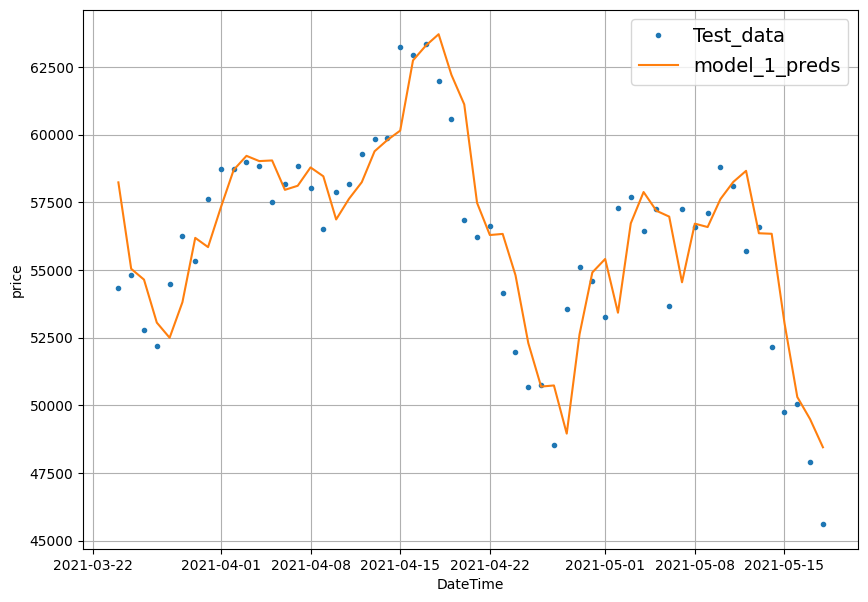

In [ ]:
offset=500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_graph(timestamps=x_test[-len(test_windows):], values=test_horizons,start=offset,  label="Test_data")
plot_graph(timestamps=x_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [ ]:
!nvidia-smi

Sat Jul 29 06:16:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    29W /  70W |    635MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**MODEL 3**

**WITH WINDOW=30 , HORIZON=1**

In [ ]:
WINDOW_SIZE = 30
HORIZON = 1

X_step =np.expand_dims(np.arange(30),axis=0)
X_index =X_step+np.expand_dims(np.arange(len(prices)-WINDOW_SIZE+HORIZON-1),axis=0).transpose()
#(2780,7)
#type(coin_price), type(prices)
window_array=prices[X_index]
windows_2 , horizons_2 = window(window_array)
len(windows_2), len(horizons_2)

for i in range(3):
  print(f"windows -> {windows_2[i]} and horizons - > {horizons_2[i]}")

windows -> [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666] and horizons - > 197.4
windows -> [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
 124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333
 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333
 188.29716 200.70166 180.355   175.03166 177.6965  187.15983 192.75666
 197.4    ] and horizons - > 196.02499
windows -> [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049
 125.96116 125.27966 125.9275  126.38333 135.24199 133.20333 142.76333
 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333 188.29716
 200.70166 180.355   175.03166 177.6965  187.15983 192.75666 197.4
 196.02499] and horizons - > 198.04883


In [ ]:


def splitting_2(w,h,test_size=0.2):
  split_size = int(len(w)*(1-test_size))

  train_windows_2 = windows_2[:split_size]
  train_horizons_2 = horizons_2[:split_size]

  test_windows_2 = windows_2[split_size:]
  test_horizons_2 = horizons_2[split_size:]

  return train_windows_2 , test_windows_2 , train_horizons_2 ,test_horizons_2

In [ ]:
train_windows_2 , test_windows_2 , train_horizons_2 ,test_horizons_2 = splitting_2(windows_2,horizons_2,test_size=0.2)

In [ ]:
model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(HORIZON,activation = "linear")
],name="model_")

model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

model_2.fit(train_windows_2,train_horizons_2,epochs=100,batch_size=128,validation_data=(test_windows_2,test_horizons_2),callbacks=[checkpoint(model_name="model_2")])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 2921.7444 - mae: 2921.7444 

18/18 [==============================] - 2s 76ms/step - loss: 2652.4348 - mae: 2652.4348 - val_loss: 5331.2891 - val_mae: 5331.2891
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 661.6856 - mae: 661.6856  

18/18 [==============================] - 1s 45ms/step - loss: 578.9924 - mae: 578.9924 - val_loss: 2190.8225 - val_mae: 2190.8225
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 346.5980 - mae: 346.5980

18/18 [==============================] - 1s 45ms/step - loss: 329.4388 - mae: 329.4388 - val_loss: 1409.0840 - val_mae: 1409.0840
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 232.7947 - mae: 232.7947

18/18 [==============================] - 1s 43ms/step - loss: 227.8166 - mae: 227.8166 - val_loss: 1127.6388 - val_mae: 1127.6388
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 253.7874 - mae: 253.7874

18/18 [==============================] - 1s 31ms/step - loss: 193.9657 - mae: 193.9657 - val_loss: 1117.3879 - val_mae: 1117.3879
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 222.7745 - mae: 222.7745

18/18 [==============================] - 1s 31ms/step - loss: 185.8093 - mae: 185.8093 - val_loss: 949.8488 - val_mae: 949.8488
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 171.4232 - mae: 171.4232 - val_loss: 1062.2759 - val_mae: 1062.2759
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 169.4833 - mae: 169.4833 - val_loss: 961.1450 - val_mae: 961.1450
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 179.2074 - mae: 179.2074 - val_loss: 1104.1998 - val_mae: 1104.1998
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 174.4022 - mae: 174.4022 - val_loss: 958.0000 - val_mae: 958.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 189.1944 - mae: 189.1944

18/18 [==============================] - 1s 30ms/step - loss: 169.2088 - mae: 169.2088 - val_loss: 928.5674 - val_mae: 928.5674
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 165.6771 - mae: 165.6771 - val_loss: 1039.7412 - val_mae: 1039.7412
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 165.1588 - mae: 165.1588 - val_loss: 940.6254 - val_mae: 940.6254
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 127.7172 - mae: 127.7172

18/18 [==============================] - 1s 30ms/step - loss: 156.9834 - mae: 156.9834 - val_loss: 909.1392 - val_mae: 909.1392
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 161.0079 - mae: 161.0079 - val_loss: 1039.4081 - val_mae: 1039.4081
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 182.3764 - mae: 182.3764

18/18 [==============================] - 1s 30ms/step - loss: 156.3562 - mae: 156.3562 - val_loss: 875.0060 - val_mae: 875.0060
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 129.6564 - mae: 129.6564

18/18 [==============================] - 1s 31ms/step - loss: 151.6151 - mae: 151.6151 - val_loss: 819.8372 - val_mae: 819.8372
Epoch 18/100
15/18 [========================>.....] - ETA: 0s - loss: 146.2210 - mae: 146.2210

18/18 [==============================] - 1s 32ms/step - loss: 144.6573 - mae: 144.6573 - val_loss: 776.4336 - val_mae: 776.4336
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 146.7050 - mae: 146.7050 - val_loss: 779.1638 - val_mae: 779.1638
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 139.3981 - mae: 139.3981 - val_loss: 801.9980 - val_mae: 801.9980
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 139.4080 - mae: 139.4080 - val_loss: 806.9504 - val_mae: 806.9504
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 148.6749 - mae: 148.6749 - val_loss: 777.4504 - val_mae: 777.4504
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 143.9806 - mae: 143.9806 - val_loss: 839.0120 - val_mae: 839.0120
Epoch 24/100
18/18 [==============================] - 0s 6ms/step - loss: 187.2053 - mae: 187.2053 - val_loss: 1107.0398 - val_mae: 1107.0398
Epoch 25/100
17/18 [==========

18/18 [==============================] - 1s 31ms/step - loss: 158.8226 - mae: 158.8226 - val_loss: 728.6222 - val_mae: 728.6222
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 135.8245 - mae: 135.8245 - val_loss: 972.3138 - val_mae: 972.3138
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 145.2413 - mae: 145.2413 - val_loss: 786.0970 - val_mae: 786.0970
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 136.3129 - mae: 136.3129 - val_loss: 772.0675 - val_mae: 772.0675
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 136.3193 - mae: 136.3193 - val_loss: 848.8188 - val_mae: 848.8188
Epoch 30/100
16/18 [=========================>....] - ETA: 0s - loss: 146.9710 - mae: 146.9710

18/18 [==============================] - 1s 31ms/step - loss: 146.6500 - mae: 146.6500 - val_loss: 704.2040 - val_mae: 704.2040
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 146.3344 - mae: 146.3344

18/18 [==============================] - 1s 31ms/step - loss: 129.4852 - mae: 129.4852 - val_loss: 696.0500 - val_mae: 696.0500
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 129.4052 - mae: 129.4052 - val_loss: 881.3259 - val_mae: 881.3259
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 130.2868 - mae: 130.2868 - val_loss: 718.4396 - val_mae: 718.4396
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 98.3675 - mae: 98.3675

18/18 [==============================] - 1s 30ms/step - loss: 139.6153 - mae: 139.6153 - val_loss: 684.9438 - val_mae: 684.9438
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 150.4038 - mae: 150.4038 - val_loss: 703.5762 - val_mae: 703.5762
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 155.3886 - mae: 155.3886 - val_loss: 1105.3745 - val_mae: 1105.3745
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 159.5748 - mae: 159.5748 - val_loss: 1069.2618 - val_mae: 1069.2618
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 162.8746 - mae: 162.8746 - val_loss: 852.1942 - val_mae: 852.1942
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 147.5377 - mae: 147.5377 - val_loss: 926.9459 - val_mae: 926.9459
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 161.0836 - mae: 161.0836 - val_loss: 945.1897 - val_mae: 945.1897
Epoch 41/100
18/18 [========

18/18 [==============================] - 1s 32ms/step - loss: 121.3770 - mae: 121.3770 - val_loss: 662.1631 - val_mae: 662.1631
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 154.2284 - mae: 154.2284

18/18 [==============================] - 1s 30ms/step - loss: 124.9599 - mae: 124.9599 - val_loss: 654.5815 - val_mae: 654.5815
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 121.4183 - mae: 121.4183 - val_loss: 661.3781 - val_mae: 661.3781
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 123.1441 - mae: 123.1441 - val_loss: 757.6226 - val_mae: 757.6226
Epoch 48/100
15/18 [========================>.....] - ETA: 0s - loss: 139.6984 - mae: 139.6984

18/18 [==============================] - 1s 69ms/step - loss: 136.5660 - mae: 136.5660 - val_loss: 646.8375 - val_mae: 646.8375
Epoch 49/100
18/18 [==============================] - 0s 8ms/step - loss: 124.6503 - mae: 124.6503 - val_loss: 724.2598 - val_mae: 724.2598
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 132.2833 - mae: 132.2833 - val_loss: 1054.1536 - val_mae: 1054.1536
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 170.7661 - mae: 170.7661 - val_loss: 780.4307 - val_mae: 780.4307
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 153.9323 - mae: 153.9323 - val_loss: 656.6174 - val_mae: 656.6174
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 132.1716 - mae: 132.1716 - val_loss: 661.8410 - val_mae: 661.8410
Epoch 54/100
18/18 [==============================] - 0s 8ms/step - loss: 130.3781 - mae: 130.3781 - val_loss: 730.0377 - val_mae: 730.0377
Epoch 55/100
18/18 [==========

18/18 [==============================] - 1s 44ms/step - loss: 118.7283 - mae: 118.7283 - val_loss: 635.5426 - val_mae: 635.5426
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 118.7861 - mae: 118.7861 - val_loss: 754.2218 - val_mae: 754.2218
Epoch 58/100
18/18 [==============================] - 0s 8ms/step - loss: 130.9526 - mae: 130.9526 - val_loss: 903.4304 - val_mae: 903.4304
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 141.1032 - mae: 141.1032 - val_loss: 815.7653 - val_mae: 815.7653
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 133.4657 - mae: 133.4657 - val_loss: 754.9299 - val_mae: 754.9299
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 127.7967 - mae: 127.7967 - val_loss: 677.5635 - val_mae: 677.5635
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 123.8251 - mae: 123.8251 - val_loss: 700.3340 - val_mae: 700.3340
Epoch 63/100
18/18 [============

18/18 [==============================] - 1s 31ms/step - loss: 125.5482 - mae: 125.5482 - val_loss: 622.6720 - val_mae: 622.6720
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 114.0854 - mae: 114.0854 - val_loss: 754.7635 - val_mae: 754.7635
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 124.4768 - mae: 124.4768 - val_loss: 982.3339 - val_mae: 982.3339
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 187.6783 - mae: 187.6783

18/18 [==============================] - 1s 30ms/step - loss: 134.5498 - mae: 134.5498 - val_loss: 622.0497 - val_mae: 622.0497
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 123.6247 - mae: 123.6247 - val_loss: 643.8039 - val_mae: 643.8039
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 126.3890 - mae: 126.3890 - val_loss: 713.2054 - val_mae: 713.2054
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 120.4343 - mae: 120.4343 - val_loss: 634.5390 - val_mae: 634.5390
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 122.7647 - mae: 122.7647 - val_loss: 689.6325 - val_mae: 689.6325
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 136.2746 - mae: 136.2746

18/18 [==============================] - 1s 30ms/step - loss: 119.6730 - mae: 119.6730 - val_loss: 615.2704 - val_mae: 615.2704
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 127.1605 - mae: 127.1605 - val_loss: 779.4586 - val_mae: 779.4586
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 126.6173 - mae: 126.6173 - val_loss: 619.4020 - val_mae: 619.4020
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9019 - mae: 113.9019 - val_loss: 652.7057 - val_mae: 652.7057
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 121.0111 - mae: 121.0111 - val_loss: 674.5262 - val_mae: 674.5262
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4893 - mae: 116.4893 - val_loss: 1042.4039 - val_mae: 1042.4039
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 123.1342 - mae: 123.1342 - val_loss: 798.9707 - val_mae: 798.9707
Epoch 80/100
18/18 [==========

18/18 [==============================] - 1s 32ms/step - loss: 119.1111 - mae: 119.1111 - val_loss: 605.4804 - val_mae: 605.4804
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 114.1266 - mae: 114.1266 - val_loss: 632.1490 - val_mae: 632.1490
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8530 - mae: 113.8530 - val_loss: 606.6252 - val_mae: 606.6252
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3919 - mae: 114.3919 - val_loss: 704.8458 - val_mae: 704.8458
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 126.5267 - mae: 126.5267 - val_loss: 698.5420 - val_mae: 698.5420
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0829 - mae: 116.0829 - val_loss: 616.5862 - val_mae: 616.5862
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4984 - mae: 119.4984 - val_loss: 680.8832 - val_mae: 680.8832
Epoch 88/100
18/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 126.2841 - mae: 126.2841 - val_loss: 600.2666 - val_mae: 600.2666
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1230 - mae: 113.1230 - val_loss: 867.4284 - val_mae: 867.4284
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 132.6097 - mae: 132.6097 - val_loss: 657.3781 - val_mae: 657.3781
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 118.6786 - mae: 118.6786 - val_loss: 618.3220 - val_mae: 618.3220
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6515 - mae: 113.6515 - val_loss: 683.3871 - val_mae: 683.3871
Epoch 96/100
16/18 [=========================>....] - ETA: 0s - loss: 121.3975 - mae: 121.3975

18/18 [==============================] - 1s 32ms/step - loss: 119.7744 - mae: 119.7744 - val_loss: 599.4490 - val_mae: 599.4490
Epoch 97/100
 1/18 [>.............................] - ETA: 0s - loss: 128.2225 - mae: 128.2225

18/18 [==============================] - 1s 30ms/step - loss: 123.2778 - mae: 123.2778 - val_loss: 598.3282 - val_mae: 598.3282
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 129.1681 - mae: 129.1681 - val_loss: 600.4708 - val_mae: 600.4708
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 107.8548 - mae: 107.8548

18/18 [==============================] - 1s 30ms/step - loss: 115.3718 - mae: 115.3718 - val_loss: 593.2765 - val_mae: 593.2765
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 115.8476 - mae: 115.8476 - val_loss: 668.2236 - val_mae: 668.2236


In [ ]:
model_2 = tf.keras.models.load_model("/content/model_check/model_2")

In [ ]:
model_2.evaluate(test_windows_2,test_horizons_2)

18/18 [==============================] - 0s 3ms/step - loss: 593.2765 - mae: 593.2765


[593.2764892578125, 593.2764892578125]

In [ ]:
model_2_preds = tf.squeeze(model_2.predict(test_windows_2))

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_2_results = calculate_error(y_true=test_horizons_2,y_preds=model_2_preds)
model_2_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=593.2765>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1265793.6>,
 'root_mse': <tf.Tensor: shape=(), dtype=float32, numpy=1125.075>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.68641>,
 'mean_scaled_error': <tf.Tensor: shape=(), dtype=float32, numpy=1.0451725>}


**MODEL 3**

*WITH HORIZON = 30 AND WINDOW=30*

In [ ]:

def window_3(x,horizon=7):
  return  x[:,:-horizon] , x[:,-horizon]

In [ ]:

WINDOW_SIZE = 30
HORIZON = 7

X_step =np.expand_dims(np.arange(30),axis=0)
X_index =X_step+np.expand_dims(np.arange(len(prices)-(WINDOW_SIZE+HORIZON-1)),axis=0).transpose()
#(2780,7)
#type(coin_price), type(prices)
window_array=prices[X_index]
windows_3 , horizons_3 = window_3(window_array)
len(windows_3), len(horizons_3)

for i in range(3):
  print(f"windows -> {windows_3[i]} and horizons - > {horizons_3[i]}")

windows -> [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716] and horizons - > 200.70166
windows -> [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
 124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333
 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333
 188.29716 200.70166] and horizons - > 180.355
windows -> [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049
 125.96116 125.27966 125.9275  126.38333 135.24199 133.20333 142.76333
 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333 188.29716
 200.70166 180.355  ] and horizons - > 175.03166


In [ ]:
horizons_3[1].size

1

In [ ]:

def splitting_3(w,h,test_size=0.2):
  split_size = int(len(w)*(1-test_size))

  train_windows_3 = windows_3[:split_size]
  train_horizons_3 = horizons_3[:split_size]

  test_windows_3 = windows_3[split_size:]
  test_horizons_3 = horizons_3[split_size:]

  return train_windows_3 , test_windows_3 , train_horizons_3 ,test_horizons_3

In [ ]:

train_windows_3 , test_windows_3 , train_horizons_3 ,test_horizons_3 = splitting_3(windows_3,horizons_3)

In [ ]:



len(train_windows_3) , len(test_windows_3) , len(train_horizons_3) ,len(test_horizons_3)

(2200, 551, 2200, 551)

In [ ]:

model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(7,activation = "linear")
],name="model_3")

model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

model_3.fit(train_windows_3,train_horizons_3,epochs=100,batch_size=128,validation_data=(test_windows_3,test_horizons_3),callbacks=[checkpoint("model_3")])

Epoch 1/100
 1/18 [>.............................] - ETA: 17s - loss: 2878.3118 - mae: 2878.3118

18/18 [==============================] - 2s 39ms/step - loss: 1154.6556 - mae: 1154.6556 - val_loss: 2601.6633 - val_mae: 2601.6633
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 519.3063 - mae: 519.3063

18/18 [==============================] - 1s 31ms/step - loss: 431.9488 - mae: 431.9488 - val_loss: 2058.9624 - val_mae: 2058.9624
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 279.5699 - mae: 279.5699

18/18 [==============================] - 1s 31ms/step - loss: 322.0607 - mae: 322.0607 - val_loss: 1547.3269 - val_mae: 1547.3269
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 199.6846 - mae: 199.6846

18/18 [==============================] - 1s 32ms/step - loss: 283.4742 - mae: 283.4742 - val_loss: 1365.0554 - val_mae: 1365.0554
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 257.4766 - mae: 257.4766

18/18 [==============================] - 1s 51ms/step - loss: 257.4766 - mae: 257.4766 - val_loss: 1220.8341 - val_mae: 1220.8341
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 237.9575 - mae: 237.9575 - val_loss: 1238.0774 - val_mae: 1238.0774
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 206.2481 - mae: 206.2481

18/18 [==============================] - 1s 33ms/step - loss: 222.8243 - mae: 222.8243 - val_loss: 1122.5891 - val_mae: 1122.5891
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 214.3763 - mae: 214.3763

18/18 [==============================] - 1s 30ms/step - loss: 204.0568 - mae: 204.0568 - val_loss: 1014.3555 - val_mae: 1014.3555
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 194.6019 - mae: 194.6019

18/18 [==============================] - 1s 32ms/step - loss: 194.6019 - mae: 194.6019 - val_loss: 970.8624 - val_mae: 970.8624
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 186.3594 - mae: 186.3594

18/18 [==============================] - 1s 31ms/step - loss: 186.3594 - mae: 186.3594 - val_loss: 942.5509 - val_mae: 942.5509
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 179.7407 - mae: 179.7407

18/18 [==============================] - 1s 32ms/step - loss: 179.5447 - mae: 179.5447 - val_loss: 934.7175 - val_mae: 934.7175
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 175.8357 - mae: 175.8357 - val_loss: 991.1444 - val_mae: 991.1444
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 178.8259 - mae: 178.8259 - val_loss: 952.4672 - val_mae: 952.4672
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 170.8142 - mae: 170.8142

18/18 [==============================] - 1s 33ms/step - loss: 170.8142 - mae: 170.8142 - val_loss: 912.2913 - val_mae: 912.2913
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 109.6804 - mae: 109.6804

18/18 [==============================] - 1s 32ms/step - loss: 165.7606 - mae: 165.7606 - val_loss: 849.4395 - val_mae: 849.4395
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 163.3429 - mae: 163.3429

18/18 [==============================] - 1s 32ms/step - loss: 163.3429 - mae: 163.3429 - val_loss: 829.8385 - val_mae: 829.8385
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 155.7831 - mae: 155.7831 - val_loss: 875.5166 - val_mae: 875.5166
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 163.6552 - mae: 163.6552 - val_loss: 856.5417 - val_mae: 856.5417
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 197.9994 - mae: 197.9994

18/18 [==============================] - 1s 42ms/step - loss: 164.8851 - mae: 164.8851 - val_loss: 803.2123 - val_mae: 803.2123
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 154.2941 - mae: 154.2941

18/18 [==============================] - 1s 45ms/step - loss: 152.5146 - mae: 152.5146 - val_loss: 796.3922 - val_mae: 796.3922
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 147.3783 - mae: 147.3783

18/18 [==============================] - 1s 45ms/step - loss: 151.9936 - mae: 151.9936 - val_loss: 786.9818 - val_mae: 786.9818
Epoch 22/100
14/18 [======================>.......] - ETA: 0s - loss: 150.8832 - mae: 150.8832

18/18 [==============================] - 1s 45ms/step - loss: 146.5996 - mae: 146.5996 - val_loss: 771.3665 - val_mae: 771.3665
Epoch 23/100
15/18 [========================>.....] - ETA: 0s - loss: 149.8202 - mae: 149.8202

18/18 [==============================] - 1s 45ms/step - loss: 144.9152 - mae: 144.9152 - val_loss: 757.8429 - val_mae: 757.8429
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 145.3016 - mae: 145.3016 - val_loss: 820.6620 - val_mae: 820.6620
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 160.8465 - mae: 160.8465 - val_loss: 849.9791 - val_mae: 849.9791
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 156.2740 - mae: 156.2740 - val_loss: 765.3015 - val_mae: 765.3015
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 152.6013 - mae: 152.6013 - val_loss: 831.3534 - val_mae: 831.3534
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 145.8712 - mae: 145.8712 - val_loss: 861.2344 - val_mae: 861.2344
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 147.0585 - mae: 147.0585

18/18 [==============================] - 1s 31ms/step - loss: 141.6553 - mae: 141.6553 - val_loss: 740.4409 - val_mae: 740.4409
Epoch 30/100
16/18 [=========================>....] - ETA: 0s - loss: 139.2308 - mae: 139.2308

18/18 [==============================] - 1s 32ms/step - loss: 138.6630 - mae: 138.6630 - val_loss: 735.9363 - val_mae: 735.9363
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 142.3024 - mae: 142.3024 - val_loss: 749.3001 - val_mae: 749.3001
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 145.1639 - mae: 145.1639

18/18 [==============================] - 1s 31ms/step - loss: 149.1661 - mae: 149.1661 - val_loss: 714.4818 - val_mae: 714.4818
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 103.8417 - mae: 103.8417

18/18 [==============================] - 1s 48ms/step - loss: 138.2205 - mae: 138.2205 - val_loss: 692.7965 - val_mae: 692.7965
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 180.3445 - mae: 180.3445

18/18 [==============================] - 1s 32ms/step - loss: 135.0500 - mae: 135.0500 - val_loss: 688.3037 - val_mae: 688.3037
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 133.1624 - mae: 133.1624 - val_loss: 778.6300 - val_mae: 778.6300
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 152.1847 - mae: 152.1847 - val_loss: 707.3604 - val_mae: 707.3604
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 133.6229 - mae: 133.6229

18/18 [==============================] - 1s 33ms/step - loss: 132.9179 - mae: 132.9179 - val_loss: 677.2673 - val_mae: 677.2673
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 148.1121 - mae: 148.1121

18/18 [==============================] - 1s 30ms/step - loss: 133.1201 - mae: 133.1201 - val_loss: 667.1425 - val_mae: 667.1425
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 130.6882 - mae: 130.6882 - val_loss: 674.4805 - val_mae: 674.4805
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 132.3715 - mae: 132.3715 - val_loss: 721.4376 - val_mae: 721.4376
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 133.3128 - mae: 133.3128 - val_loss: 682.9987 - val_mae: 682.9987
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 134.8567 - mae: 134.8567

18/18 [==============================] - 1s 31ms/step - loss: 128.7061 - mae: 128.7061 - val_loss: 661.2484 - val_mae: 661.2484
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 128.4085 - mae: 128.4085 - val_loss: 672.4008 - val_mae: 672.4008
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 135.7159 - mae: 135.7159 - val_loss: 703.6818 - val_mae: 703.6818
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 135.0199 - mae: 135.0199 - val_loss: 839.3337 - val_mae: 839.3337
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 133.6169 - mae: 133.6169 - val_loss: 680.8359 - val_mae: 680.8359
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 139.4715 - mae: 139.4715 - val_loss: 703.4409 - val_mae: 703.4409
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 152.9979 - mae: 152.9979

18/18 [==============================] - 1s 32ms/step - loss: 145.5778 - mae: 145.5778 - val_loss: 636.5777 - val_mae: 636.5777
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 125.0295 - mae: 125.0295 - val_loss: 646.3627 - val_mae: 646.3627
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 125.3661 - mae: 125.3661 - val_loss: 679.8354 - val_mae: 679.8354
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 128.1449 - mae: 128.1449 - val_loss: 658.2293 - val_mae: 658.2293
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 128.5103 - mae: 128.5103 - val_loss: 668.8212 - val_mae: 668.8212
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 128.5549 - mae: 128.5549

18/18 [==============================] - 1s 32ms/step - loss: 127.4304 - mae: 127.4304 - val_loss: 629.3591 - val_mae: 629.3591
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 125.2871 - mae: 125.2871 - val_loss: 644.0538 - val_mae: 644.0538
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 134.6876 - mae: 134.6876

18/18 [==============================] - 1s 32ms/step - loss: 122.5527 - mae: 122.5527 - val_loss: 625.7215 - val_mae: 625.7215
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 124.1447 - mae: 124.1447 - val_loss: 662.5098 - val_mae: 662.5098
Epoch 57/100
 1/18 [>.............................] - ETA: 0s - loss: 216.2175 - mae: 216.2175

18/18 [==============================] - 1s 32ms/step - loss: 122.7405 - mae: 122.7405 - val_loss: 622.8510 - val_mae: 622.8510
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 126.9478 - mae: 126.9478 - val_loss: 651.8569 - val_mae: 651.8569
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 128.4247 - mae: 128.4247 - val_loss: 648.2448 - val_mae: 648.2448
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 125.1792 - mae: 125.1792 - val_loss: 652.3906 - val_mae: 652.3906
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 125.3903 - mae: 125.3903 - val_loss: 698.6486 - val_mae: 698.6486
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 134.5630 - mae: 134.5630 - val_loss: 675.9191 - val_mae: 675.9191
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 126.7543 - mae: 126.7543 - val_loss: 667.0262 - val_mae: 667.0262
Epoch 64/100
 1/18 [>...........

18/18 [==============================] - 1s 38ms/step - loss: 122.9592 - mae: 122.9592 - val_loss: 614.0102 - val_mae: 614.0102
Epoch 65/100
18/18 [==============================] - 0s 7ms/step - loss: 121.2581 - mae: 121.2581 - val_loss: 614.9586 - val_mae: 614.9586
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 127.6844 - mae: 127.6844 - val_loss: 661.0260 - val_mae: 661.0260
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 128.6564 - mae: 128.6564 - val_loss: 615.6821 - val_mae: 615.6821
Epoch 68/100
14/18 [======================>.......] - ETA: 0s - loss: 123.8880 - mae: 123.8880

18/18 [==============================] - 1s 46ms/step - loss: 120.1506 - mae: 120.1506 - val_loss: 606.2938 - val_mae: 606.2938
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 118.7509 - mae: 118.7509 - val_loss: 666.9593 - val_mae: 666.9593
Epoch 70/100
18/18 [==============================] - 0s 8ms/step - loss: 134.6754 - mae: 134.6754 - val_loss: 633.7142 - val_mae: 633.7142
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 127.3756 - mae: 127.3756 - val_loss: 629.2709 - val_mae: 629.2709
Epoch 72/100
18/18 [==============================] - 0s 9ms/step - loss: 122.1748 - mae: 122.1748 - val_loss: 627.6552 - val_mae: 627.6552
Epoch 73/100
12/18 [===================>..........] - ETA: 0s - loss: 117.7978 - mae: 117.7978

18/18 [==============================] - 1s 46ms/step - loss: 118.1954 - mae: 118.1954 - val_loss: 594.0234 - val_mae: 594.0234
Epoch 74/100
18/18 [==============================] - 0s 8ms/step - loss: 116.1181 - mae: 116.1181 - val_loss: 605.3561 - val_mae: 605.3561
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 126.7696 - mae: 126.7696 - val_loss: 670.8572 - val_mae: 670.8572
Epoch 76/100
18/18 [==============================] - 0s 9ms/step - loss: 131.5693 - mae: 131.5693 - val_loss: 613.7712 - val_mae: 613.7712
Epoch 77/100
18/18 [==============================] - 0s 8ms/step - loss: 118.1540 - mae: 118.1540 - val_loss: 632.8170 - val_mae: 632.8170
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 117.4862 - mae: 117.4862 - val_loss: 609.7335 - val_mae: 609.7335
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 117.8887 - mae: 117.8887 - val_loss: 615.1510 - val_mae: 615.1510
Epoch 80/100
18/18 [============

18/18 [==============================] - 1s 32ms/step - loss: 121.3184 - mae: 121.3184 - val_loss: 582.7246 - val_mae: 582.7246
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 152.8465 - mae: 152.8465

18/18 [==============================] - 1s 31ms/step - loss: 117.0159 - mae: 117.0159 - val_loss: 580.5123 - val_mae: 580.5123
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 114.6547 - mae: 114.6547 - val_loss: 613.2495 - val_mae: 613.2495
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4822 - mae: 119.4822 - val_loss: 583.7822 - val_mae: 583.7822
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8829 - mae: 115.8829 - val_loss: 595.6840 - val_mae: 595.6840
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1775 - mae: 115.1775 - val_loss: 583.5115 - val_mae: 583.5115
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3133 - mae: 115.3133 - val_loss: 643.5701 - val_mae: 643.5701
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 116.5588 - mae: 116.5588 - val_loss: 596.0581 - val_mae: 596.0581
Epoch 89/100
 1/18 [>...........

18/18 [==============================] - 1s 31ms/step - loss: 116.7065 - mae: 116.7065 - val_loss: 578.2576 - val_mae: 578.2576
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1608 - mae: 115.1608 - val_loss: 623.6163 - val_mae: 623.6163
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 118.0003 - mae: 118.0003 - val_loss: 655.8997 - val_mae: 655.8997
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 119.2578 - mae: 119.2578 - val_loss: 762.8112 - val_mae: 762.8112
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 129.0695 - mae: 129.0695 - val_loss: 623.6644 - val_mae: 623.6644
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 120.5025 - mae: 120.5025 - val_loss: 590.1335 - val_mae: 590.1335
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 118.5242 - mae: 118.5242 - val_loss: 605.8956 - val_mae: 605.8956
Epoch 96/100
 1/18 [>...........

18/18 [==============================] - 1s 32ms/step - loss: 114.5778 - mae: 114.5778 - val_loss: 563.9298 - val_mae: 563.9298
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8398 - mae: 113.8398 - val_loss: 616.5577 - val_mae: 616.5577
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5673 - mae: 113.5673 - val_loss: 573.2471 - val_mae: 573.2471
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6991 - mae: 114.6991 - val_loss: 594.7177 - val_mae: 594.7177
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6426 - mae: 115.6426 - val_loss: 571.5989 - val_mae: 571.5989


In [ ]:
model_3.evaluate(test_windows_3,test_horizons_3)

18/18 [==============================] - 0s 2ms/step - loss: 571.5989 - mae: 571.5989


[571.598876953125, 571.598876953125]

In [ ]:
model_3 = tf.keras.models.load_model("/content/model_check/model_3")

In [ ]:

model_3.evaluate(test_windows_3,test_horizons_3)

18/18 [==============================] - 0s 2ms/step - loss: 563.9298 - mae: 563.9298


[563.9298095703125, 563.9298095703125]

In [ ]:


model_3_preds = tf.squeeze(model_3.predict(test_windows_3))

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9339.758 , 9368.466 , 9388.897 , 9126.298 , 9364.32  , 9239.481 ,
        9367.192 ],
       [9180.903 , 9154.583 , 9204.219 , 9218.615 , 9180.912 , 9258.035 ,
        9180.832 ],
       [9247.054 , 9045.755 , 9182.181 , 9293.122 , 9174.742 , 9229.33  ,
        9044.191 ],
       [9205.6455, 9096.636 , 9225.743 , 9246.918 , 9188.021 , 9214.042 ,
        9052.585 ],
       [9449.049 , 9206.064 , 9342.907 , 9284.808 , 9416.215 , 9349.825 ,
        9301.455 ]], dtype=float32)>

In [ ]:
def calculate_error_updated(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
test_horizons_3.shape,model_3_preds.shape

((551,), TensorShape([551, 7]))

In [ ]:
tf.reduce_mean(model_3_preds)

<tf.Tensor: shape=(), dtype=float32, numpy=19118.328>

In [ ]:
model_3_results = calculate_error_updated(tf.squeeze(test_horizons_3),tf.reduce_mean(model_3_preds))
model_3_results

{'mae': 13509.321,
 'mse': 284734460.0,
 'rmse': 16874.076,
 'mape': 91.68512,
 'mase': 25.401148}

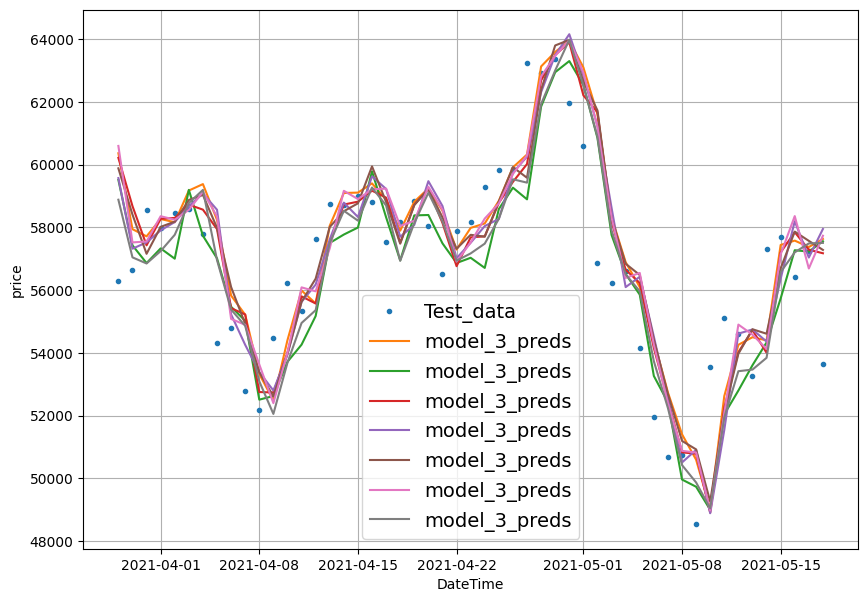

In [ ]:
offset=500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_graph(timestamps=x_test[-len(test_windows_3):], values=test_horizons_3,start=offset,  label="Test_data")
plot_graph(timestamps=x_test[-len(test_windows_3):], values=model_3_preds, start=offset, format="-", label="model_3_preds")


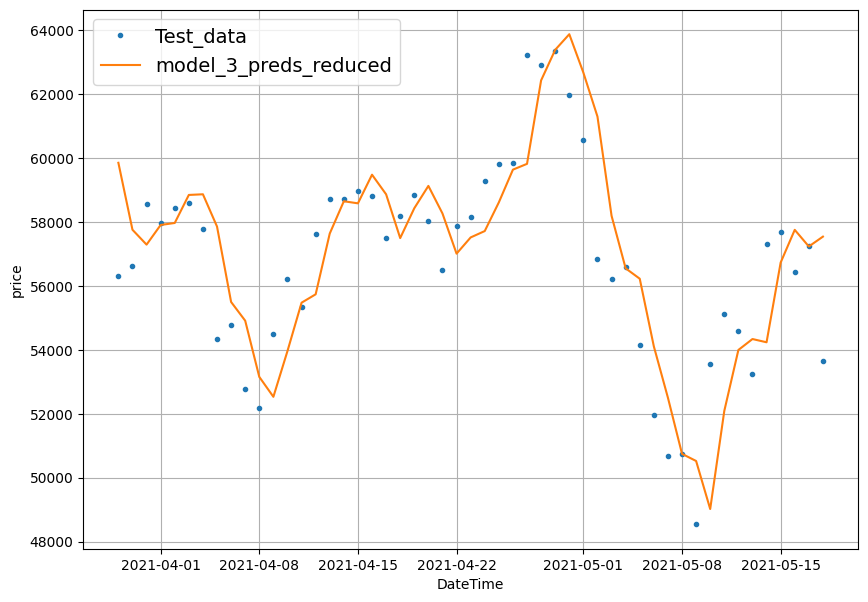

In [ ]:
offset=500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_graph(timestamps=x_test[-len(test_windows_3):], values=test_horizons_3,start=offset,  label="Test_data")
plot_graph(timestamps=x_test[-len(test_windows_3):], values=tf.reduce_mean(model_3_preds,axis=1), start=offset, format="-", label="model_3_preds_reduced")

In [ ]:
import numpy as np
pd.DataFrame({"naive": model_0_results['mae'].numpy(),
              "horizon_1_window_7": model_1_results["mae"].numpy(),
              "horizon_1_window_30": model_2_results["mae"].numpy(),
              "horizon_7_window_30": model_3_results["mae"]},index=["mae"])

,naive,horizon_1_window_7,horizon_1_window_30,horizon_7_window_30
mae,567.980227,564.998779,593.276489,13509.321289


**MODEL 4**

**WINDOW=7 HORIZON=1 (convolution model)**


In [ ]:



def window_4(x,horizon=1):
  return  x[:,:-horizon] , x[:,-horizon]

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1

X_step =np.expand_dims(np.arange(7),axis=0)
X_index =X_step+np.expand_dims(np.arange(len(prices)-(WINDOW_SIZE+HORIZON-1)),axis=0).transpose()
#(2780,7)
#type(coin_price), type(prices)
window_array=prices[X_index]
windows_4 , horizons_4 = window_4(window_array)
len(windows_4), len(horizons_4)

for i in range(3):
  print(f"windows -> {windows_4[i]} and horizons - > {horizons_4[i]}")

windows -> [123.65499 125.455   108.58483 118.67466 121.33866 120.65533] and horizons - > 121.795
windows -> [125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] and horizons - > 123.033
windows -> [108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] and horizons - > 124.049


In [ ]:
train_windows_4 , test_windows_4 , train_horizons_4 , test_horizons_4 = splitting(windows_4,horizons_4)

In [ ]:
x=train_windows_4[0]
x.shape

(6,)

In [ ]:
# now we expand the dimensions of x using lambda function and tf expand_dims ((NOTE- WE CAN EXPAND IT WITHOUT USING `tf.expand_dims` ALSO but using lambad helps us while modelling))


expand_dimensions = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1))


In [ ]:
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dimensions(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dimensions(x)}")

Original shape: (6,)
Expanded shape: (6, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]]


In [ ]:

model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    tf.keras.layers.Conv1D(128,6,padding="causal",activation="relu"),
    tf.keras.layers.Dense(1)
],name="model_4")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows_4,
            train_horizons_4,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows_4, test_horizons_4),
            callbacks=[checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2950.2595

18/18 [==============================] - 7s 77ms/step - loss: 2950.2595 - val_loss: 16196.9805
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 2951.9683 - val_loss: 16680.8379
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 2950.5403 - val_loss: 16791.2676
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 2950.5273 - val_loss: 16636.5156
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 2952.5042 - val_loss: 16451.5547
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 2952.7275 - val_loss: 16659.8730
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 2951.1362 - val_loss: 16548.2852
Epoch 8/100
13/18 [====================>.........] - ETA: 0s - loss: 2864.7632

18/18 [==============================] - 1s 63ms/step - loss: 2949.9639 - val_loss: 16097.6084
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 2952.3911 - val_loss: 16131.3359
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 2930.7876

18/18 [==============================] - 1s 53ms/step - loss: 2950.4819 - val_loss: 15580.2588
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 2956.1089 - val_loss: 17208.8086
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 2951.3857 - val_loss: 16776.9746
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 2951.1189 - val_loss: 16635.0703
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 2952.8918 - val_loss: 17464.9648
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 2954.6890 - val_loss: 16440.8945
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 2948.9404 - val_loss: 16226.0488
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 2949.1187 - val_loss: 16960.6934
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 2951.0730 - val_loss: 16995.6523
Epoch 19/100
18/18 [=============================

18/18 [==============================] - 1s 42ms/step - loss: 2952.0496 - val_loss: 15375.0195
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 2951.3748 - val_loss: 16013.1416
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 2950.8066 - val_loss: 16798.6797
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 2948.2524 - val_loss: 15772.4355
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 2948.5989 - val_loss: 16241.0684
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 2948.1387 - val_loss: 16608.0840
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 2950.2312 - val_loss: 17105.2285
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 2951.8232 - val_loss: 15898.4717
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 2947.2178 - val_loss: 17155.3457
Epoch 44/100
18/18 [=============================

In [ ]:
model_4.evaluate(test_windows_4, test_horizons_4)

18/18 [==============================] - 0s 5ms/step - loss: 16772.0176


16772.017578125

In [ ]:
model_4 = tf.keras.models.load_model("/content/model_check/model_4")

In [ ]:

model_4.evaluate(test_windows_4, test_horizons_4)

18/18 [==============================] - 0s 4ms/step - loss: 15375.0215


15375.021484375

In [ ]:


model_4_preds= model_4.predict(test_windows_4)
model_4_preds[:10].shape

18/18 [==============================] - 0s 3ms/step


(10, 1, 1)

In [ ]:
model_4_results = calculate_error_updated(test_horizons_4,tf.squeeze(model_4_preds))
model_4_results

{'mae': 15375.021,
 'mse': 417253800.0,
 'rmse': 20426.791,
 'mape': 76.640854,
 'mase': 27.221306}

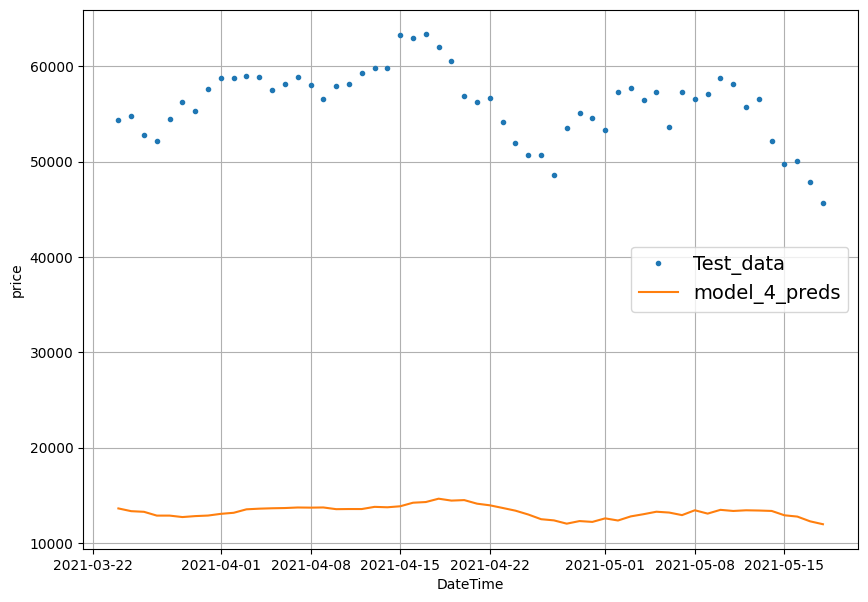

In [ ]:
offset=500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_graph(timestamps=x_test[-len(test_windows_4):], values=test_horizons_4,start=offset,  label="Test_data")
plot_graph(timestamps=x_test[-len(test_windows_4):], values=tf.squeeze(model_4_preds), start=offset, format="-", label="model_4_preds")

**MODEL 5**
*using LSTM*

In [ ]:
tf.random.set_seed(45)

inputs = tf.keras.layers.Input(shape=(6,))
x = tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=1))(inputs)
#x = tf.keras.layers.LSTM(64,return_sequences=True)(x)
x = tf.keras.layers.LSTM(48,activation="relu")(x)
#x = tf.keras.layers.Dense(32,activation="relu")(x)
outputs = tf.keras.layers.Dense(HORIZON) (x)

model_5 = tf.keras.Model(inputs,outputs,name="model_5_lstm")


model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows_4,
            train_horizons_4,
            epochs=50,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows_4, test_horizons_4),
            callbacks=[checkpoint(model_name="model_5_LSTM")])

Epoch 1/50
18/18 [==============================] - 5s 141ms/step - loss: 3150.1155 - val_loss: 17110.7578
Epoch 2/50
18/18 [==============================] - 2s 108ms/step - loss: 2198.3918 - val_loss: 10913.5459
Epoch 3/50
18/18 [==============================] - 2s 108ms/step - loss: 971.9794 - val_loss: 1365.9904
Epoch 4/50
18/18 [==============================] - 2s 108ms/step - loss: 234.1732 - val_loss: 969.7833
Epoch 5/50
18/18 [==============================] - 0s 7ms/step - loss: 186.6349 - val_loss: 970.0355
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 177.6363 - val_loss: 1008.6976
Epoch 7/50
18/18 [==============================] - 0s 8ms/step - loss: 173.9701 - val_loss: 984.1439
Epoch 8/50
18/18 [==============================] - 0s 8ms/step - loss: 173.2320 - val_loss: 978.2885
Epoch 9/50
18/18 [==============================] - 3s 155ms/step - loss: 172.8109 - val_loss: 954.6453
Epoch 10/50
18/18 [==============================] - 0s 12ms/ste

In [ ]:

model_5.evaluate(test_windows_4,test_horizons_4)

18/18 [==============================] - 0s 3ms/step - loss: 736.0711


736.0711059570312

In [ ]:

model_5 = tf.keras.models.load_model("/content/model_check/model_5_LSTM")

In [ ]:





model_5.evaluate(test_windows_4,test_horizons_4)

18/18 [==============================] - 0s 3ms/step - loss: 736.0711


736.0711059570312

In [ ]:
model_5_preds = model_5.predict(test_windows_4)
model_5_preds.shape

18/18 [==============================] - 0s 2ms/step


(556, 1)

In [ ]:
model_5_preds_sq = tf.squeeze(model_5_preds)
model_5_preds_sq.shape

TensorShape([556])

In [ ]:
model_5_results = calculate_error_updated(y_true=test_horizons_4,y_pred=model_5_preds_sq)
model_5_results

{'mae': 736.071,
 'mse': 1837865.5,
 'rmse': 1355.679,
 'mape': 3.3100288,
 'mase': 1.3032055}

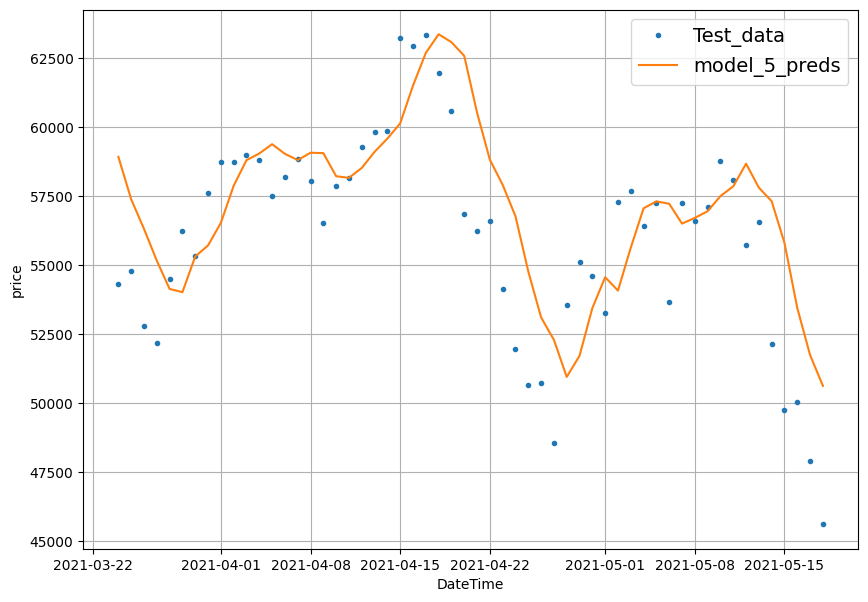

In [ ]:
offset=500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_graph(timestamps=x_test[-len(test_windows_4):], values=test_horizons_4,start=offset,  label="Test_data")
plot_graph(timestamps=x_test[-len(test_windows_4):], values=tf.squeeze(model_5_preds_sq), start=offset, format="-", label="model_5_preds")

# NOW WE SEE MultiVariate-Data

In [ ]:
bitcoin_price[:10]

,prices
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
2013-10-06,120.65533
2013-10-07,121.79500
2013-10-08,123.03300
2013-10-09,124.04900


In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")


In [ ]:
block_reward_2_days = (block_reward_3_datetime-bitcoin_price.index[0]).days
block_reward_3_days = (block_reward_4_datetime-bitcoin_price.index[0]).days

block_reward_2_days ,block_reward_3_days

(1012, 2414)

In [ ]:
bitcoin_price.index[0]

Timestamp('2013-10-01 00:00:00')

In [ ]:

bitcoin_price_copy = bitcoin_price.copy()
bitcoin_price_copy["block_reward"] = None

In [ ]:
bitcoin_price_copy.head()

,prices,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [ ]:
bitcoin_price_copy.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_price_copy.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
bitcoin_price_copy.iloc[block_reward_3_days:,-1] = block_reward_4

In [ ]:
bitcoin_price_copy.head()

,prices,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_price_copy.tail()

,prices,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

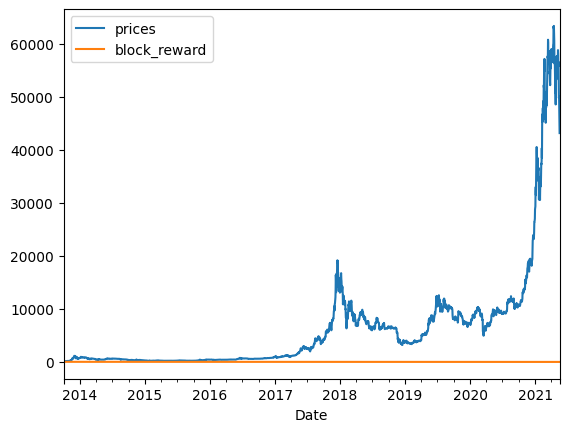

In [ ]:
bitcoin_price_copy.plot()

In [ ]:
# so we need to scale our prices with minmaxscaler

from sklearn.preprocessing import minmax_scale

scaled_bitcoin_price = pd.DataFrame(minmax_scale(bitcoin_price_copy[["prices","block_reward"]]),columns=bitcoin_price_copy.columns,index=bitcoin_price_copy.index)

<Axes: xlabel='Date'>

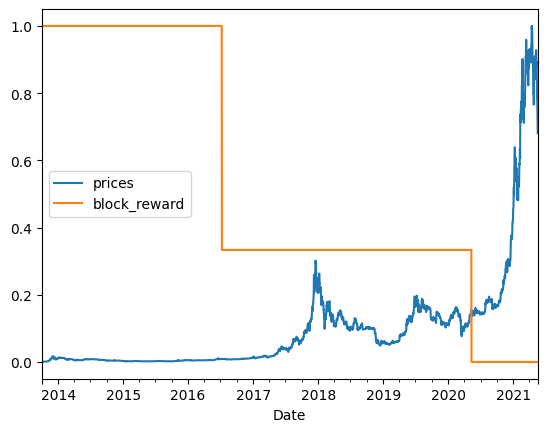

In [ ]:

scaled_bitcoin_price.plot()

In [ ]:
bitcoin_prices_windowed = bitcoin_price_copy.copy()

HORIZON , WINDOW_SIZE

(1, 7)

In [ ]:

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"prices{i+1}"] = bitcoin_prices_windowed["prices"].shift(periods=i+1)

bitcoin_prices_windowed.head(5)

,prices,block_reward,prices1,prices2,prices3,prices4,prices5,prices6,prices7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# x = windows and y = horizons

x = bitcoin_prices_windowed.dropna().drop("prices",axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["prices"].astype(np.float32)

**now we split our data into train and test**

In [ ]:
split_size = int(len(x)*0.8)
x_train , y_train = x[:split_size], y[:split_size]
x_test,y_test = x[split_size:],y[split_size:]

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test) , x_train.shape

(2224, 2224, 556, 556, (2224, 8))

**NOW WE CREATE MODELS WITH OUR MULTI-VARIATE DATA**

In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(HORIZON)
],name="model_6_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(x_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1, # only print 1 line per epoch
            validation_data=(x_test, y_test),
            callbacks=[checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 21s - loss: 2847.4224

18/18 [==============================] - 2s 46ms/step - loss: 723.1718 - val_loss: 2153.9336
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 231.8541

18/18 [==============================] - 1s 57ms/step - loss: 221.8791 - val_loss: 948.2933
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 173.2363

18/18 [==============================] - 1s 53ms/step - loss: 168.6006 - val_loss: 865.4549
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 150.7775

18/18 [==============================] - 1s 55ms/step - loss: 153.8213 - val_loss: 864.0703
Epoch 5/100
14/18 [======================>.......] - ETA: 0s - loss: 141.8910

18/18 [==============================] - 1s 54ms/step - loss: 144.4282 - val_loss: 734.9194
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 102.5439

18/18 [==============================] - 1s 37ms/step - loss: 134.5647 - val_loss: 696.1238
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 126.9560 - val_loss: 707.3441
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 125.9501 - val_loss: 706.0629
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 123.9791

18/18 [==============================] - 1s 37ms/step - loss: 120.3205 - val_loss: 623.8195
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 114.8376 - val_loss: 623.9333
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 113.8147

18/18 [==============================] - 1s 37ms/step - loss: 113.8147 - val_loss: 600.4339
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 107.3272

18/18 [==============================] - 1s 37ms/step - loss: 114.5333 - val_loss: 592.3552
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4498 - val_loss: 618.8254
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 118.2443 - val_loss: 853.6497
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 132.1823 - val_loss: 825.7537
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 100.0655

18/18 [==============================] - 1s 37ms/step - loss: 128.5537 - val_loss: 580.2190
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4472 - val_loss: 599.4937
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9950 - val_loss: 751.6367
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 121.0314 - val_loss: 727.8801
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7678 - val_loss: 585.0118
Epoch 21/100
18/18 [==============================] - 0s 4ms/step - loss: 112.6178 - val_loss: 589.4734
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 98.2707

18/18 [==============================] - 1s 37ms/step - loss: 112.5979 - val_loss: 573.7806
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9995 - val_loss: 729.3448
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 118.3389 - val_loss: 717.1838
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 112.2249 - val_loss: 921.3171
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 161.0933

18/18 [==============================] - 1s 36ms/step - loss: 134.1589 - val_loss: 570.3321
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 88.0435

18/18 [==============================] - 1s 35ms/step - loss: 116.2148 - val_loss: 567.8898
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5419 - val_loss: 573.3306
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3178 - val_loss: 616.6246
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 115.1798 - val_loss: 677.6025
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2919 - val_loss: 579.0392
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0321 - val_loss: 723.6132
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 86.2476

18/18 [==============================] - 1s 35ms/step - loss: 114.0986 - val_loss: 567.7437
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6619 - val_loss: 569.0187
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8464 - val_loss: 595.8727
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 106.9717 - val_loss: 571.9077
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3229 - val_loss: 584.1142
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 107.0638 - val_loss: 617.4890
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6474 - val_loss: 570.2078
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 113.0902

18/18 [==============================] - 1s 36ms/step - loss: 108.4875 - val_loss: 562.5602
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 116.7146 - val_loss: 577.5038
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6845 - val_loss: 564.0500
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1452 - val_loss: 631.5919
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 113.2824 - val_loss: 565.1015
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0472 - val_loss: 563.8199
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0116 - val_loss: 563.7658
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0917 - val_loss: 579.5905
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9118 - val_loss: 563.9633
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 1s 80ms/step - loss: 114.9494 - val_loss: 562.2274
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 105.1928 - val_loss: 591.7127
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 112.7525 - val_loss: 562.6139
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 111.3593 - val_loss: 695.0385
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 110.9197 - val_loss: 588.0553
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 113.6357 - val_loss: 611.4843
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 115.6291 - val_loss: 606.7104
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 106.3945 - val_loss: 576.5053
Epoch 65/100
18/18 [==============================] - 0s 7ms/step - loss: 110.2960 - val_loss: 584.2582
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 10

18/18 [==============================] - 1s 66ms/step - loss: 130.1002 - val_loss: 562.1627
Epoch 85/100
18/18 [==============================] - 0s 9ms/step - loss: 115.3503 - val_loss: 593.6005
Epoch 86/100
18/18 [==============================] - 0s 8ms/step - loss: 109.7892 - val_loss: 631.2006
Epoch 87/100
18/18 [==============================] - 0s 8ms/step - loss: 113.3832 - val_loss: 576.5577
Epoch 88/100
18/18 [==============================] - 0s 10ms/step - loss: 112.8397 - val_loss: 663.6476
Epoch 89/100
18/18 [==============================] - 0s 8ms/step - loss: 108.3725 - val_loss: 562.3174
Epoch 90/100
18/18 [==============================] - 0s 9ms/step - loss: 106.6571 - val_loss: 629.6472
Epoch 91/100
18/18 [==============================] - 0s 8ms/step - loss: 114.8064 - val_loss: 562.2446
Epoch 92/100
18/18 [==============================] - 0s 15ms/step - loss: 105.3671 - val_loss: 570.0037
Epoch 93/100
17/18 [===========================>..] - ETA: 0s - loss: 104.

18/18 [==============================] - 1s 66ms/step - loss: 105.1779 - val_loss: 562.0701
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2161 - val_loss: 588.8809
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 105.7580 - val_loss: 573.9905
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8101 - val_loss: 562.5739
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 105.3110 - val_loss: 568.8699
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 107.5324 - val_loss: 599.0825
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6539 - val_loss: 616.3923
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7248 - val_loss: 694.9459


In [ ]:
model_6.evaluate(x_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 694.9459


694.9458618164062

In [ ]:
model_6 = tf.keras.models.load_model("/content/model_check/model_6_multivariate")

In [ ]:
model_6.evaluate(x_test,y_test)


18/18 [==============================] - 0s 3ms/step - loss: 562.0700


562.0700073242188

In [ ]:
model_6_preds = model_6.predict(x_test)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_6_results = calculate_error_updated(y_test,tf.squeeze(model_6_preds))
model_6_results

{'mae': 562.0701,
 'mse': 1136321.0,
 'rmse': 1065.9835,
 'mape': 2.5351036,
 'mase': 0.98740155}

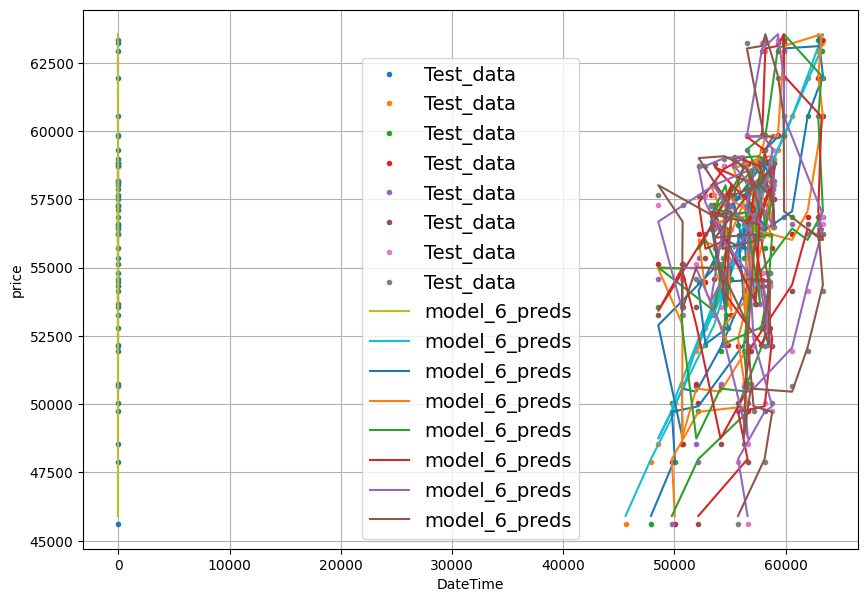

In [ ]:
offset=500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_graph(timestamps=x_test[-len(test_windows_4):], values=test_horizons_4,start=offset,  label="Test_data")
plot_graph(timestamps=x_test[-len(test_windows_4):], values=tf.squeeze(model_6_preds), start=offset, format="-", label="model_6_preds")

# NBeats

In [ ]:
class NBeats(tf.keras.layers.Layer):
  def __init__(self,input_size:int,theta_size:int,horizon:int,n_neurons:int,n_layers:int,**kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers


    self.hidden = [tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers) ]

    self.theta_layer = tf.keras.layers.Dense(theta_size,activation="relu")


  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    backcast,forecast = theta[:,:self.input_size] , theta[:,-self.horizon:]

    return backcast, forecast


In [ ]:
dummy_nbeat_block = NBeats(input_size=WINDOW_SIZE,theta_size=WINDOW_SIZE+HORIZON,horizon=HORIZON,n_neurons=128,n_layers=6)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast,forecast = dummy_nbeat_block(dummy_inputs)

print(f"backcast {tf.squeeze(backcast.numpy())}")
print(f"backcast {tf.squeeze(forecast.numpy())}")

backcast [0.13951115 0.         0.         0.13914216 0.         0.
 0.22703634]
backcast 0.21150174736976624


In [ ]:
bitcoin_prices_windowed.head()

,prices,block_reward,prices1,prices2,prices3,prices4,prices5,prices6,prices7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_price_nbeats = bitcoin_price.copy()
for i in range(WINDOW_SIZE):
  bitcoin_price_nbeats[f"price+{i+1}"] = bitcoin_price_nbeats["prices"].shift(periods=i+1)
bitcoin_price_nbeats.dropna().head()

,prices,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
X = bitcoin_price_nbeats.dropna().drop("prices", axis=1)
y = bitcoin_price_nbeats.dropna()["prices"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

**NOW WE CREATE DATASET**

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices(X_train)
train_label = tf.data.Dataset.from_tensor_slices(y_train)

test_data = tf.data.Dataset.from_tensor_slices(X_test)
test_label = tf.data.Dataset.from_tensor_slices(y_test)


train_dataset = tf.data.Dataset.zip((train_data,train_label))

test_dataset = tf.data.Dataset.zip((test_data,test_label))

train_dataset_prefetch = train_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)

test_dataset_prefetch = test_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)


train_dataset_prefetch ,test_dataset_prefetch

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:

# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON# called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON
INPUT_SIZE, THETA_SIZE


(7, 8)

**ADDING RESIDUAL CONNECTIONS**

In [ ]:
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

add_layer = tf.keras.layers.add([tensor_1,tensor_2])

sub_layer = tf.keras.layers.subtract([tensor_1,tensor_2])



print(f"add_layer {add_layer}")
print(f"sub_layer {sub_layer}")


add_layer [10 12 14 16 18 20 22 24 26 28]
sub_layer [10 10 10 10 10 10 10 10 10 10]


In [ ]:
train_dataset_prefetch, test_dataset_prefetch

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2224, 8), (2224,), (556, 8), (556,))

**NOW WE BUILD NBeats Model**

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeats(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = tf.keras.layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast =  NBeats(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = tf.keras.layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = tf.keras.layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset_prefetch,
            epochs=N_EPOCHS,
            validation_data=test_dataset_prefetch,
            verbose=1, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

Epoch 1/5000
3/3 [==============================] - 57s 920ms/step - loss: 10343.6133 - mae: 10343.6133 - mse: 320559200.0000 - val_loss: 19211.7168 - val_mae: 19211.7168 - val_mse: 649965440.0000 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 94ms/step - loss: 2643.1626 - mae: 2643.1626 - mse: 16682047.0000 - val_loss: 23160.1523 - val_mae: 23160.1523 - val_mse: 958812800.0000 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 146ms/step - loss: 6727.4692 - mae: 6727.4692 - mse: 126596016.0000 - val_loss: 9598.7656 - val_mae: 9598.7656 - val_mse: 163928704.0000 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 64ms/step - loss: 2673.5864 - mae: 2673.5864 - mse: 18503576.0000 - val_loss: 17579.0566 - val_mae: 17579.0566 - val_mse: 544388800.0000 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 149ms/step - loss: 2210.7031 - mae: 2210.7031 - mse: 11637979.0000 - val_loss: 3200.9900 - val_mae: 3200.9900 - val_mse:

In [ ]:
model_7.evaluate(test_dataset_prefetch)

1/1 [==============================] - 0s 29ms/step - loss: 566.4564 - mae: 566.4564 - mse: 1154780.2500


[566.4563598632812, 566.4563598632812, 1154780.25]

In [ ]:
model_7_preds = model_7.predict(test_dataset_prefetch)
model_7_preds.shape

1/1 [==============================] - 1s 1s/step


(556, 1)

In [ ]:
model_7_results = calculate_error_updated(y_true=y_test,y_pred=tf.squeeze(model_7_preds))
model_7_results

{'mae': 566.45636,
 'mse': 1154780.2,
 'rmse': 1074.607,
 'mape': 2.5336187,
 'mase': 0.99510694}

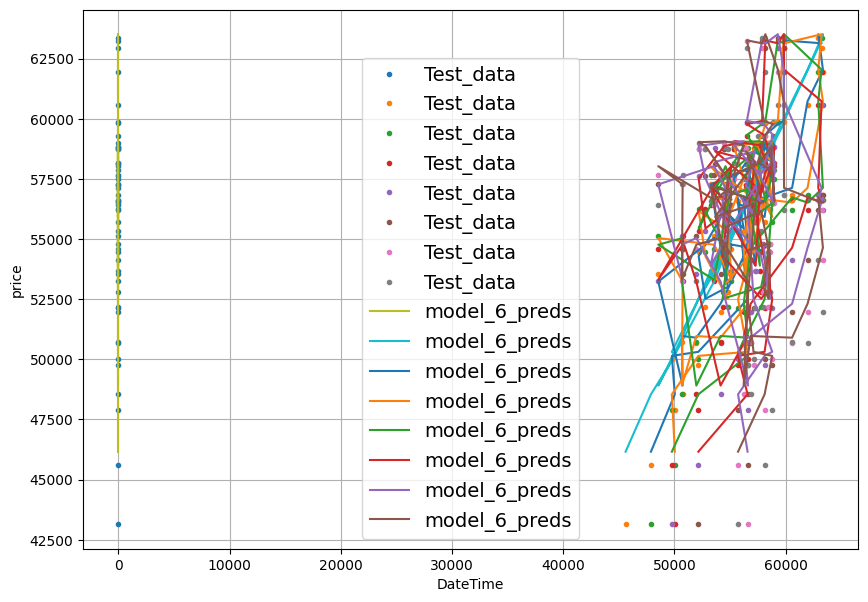

In [ ]:
offset=500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_graph(timestamps=x_test[-len(x_test):], values=y_test,start=offset,  label="Test_data")
plot_graph(timestamps=x_test[-len(x_test):], values=tf.squeeze(model_7_preds), start=offset, format="-", label="model_6_preds")

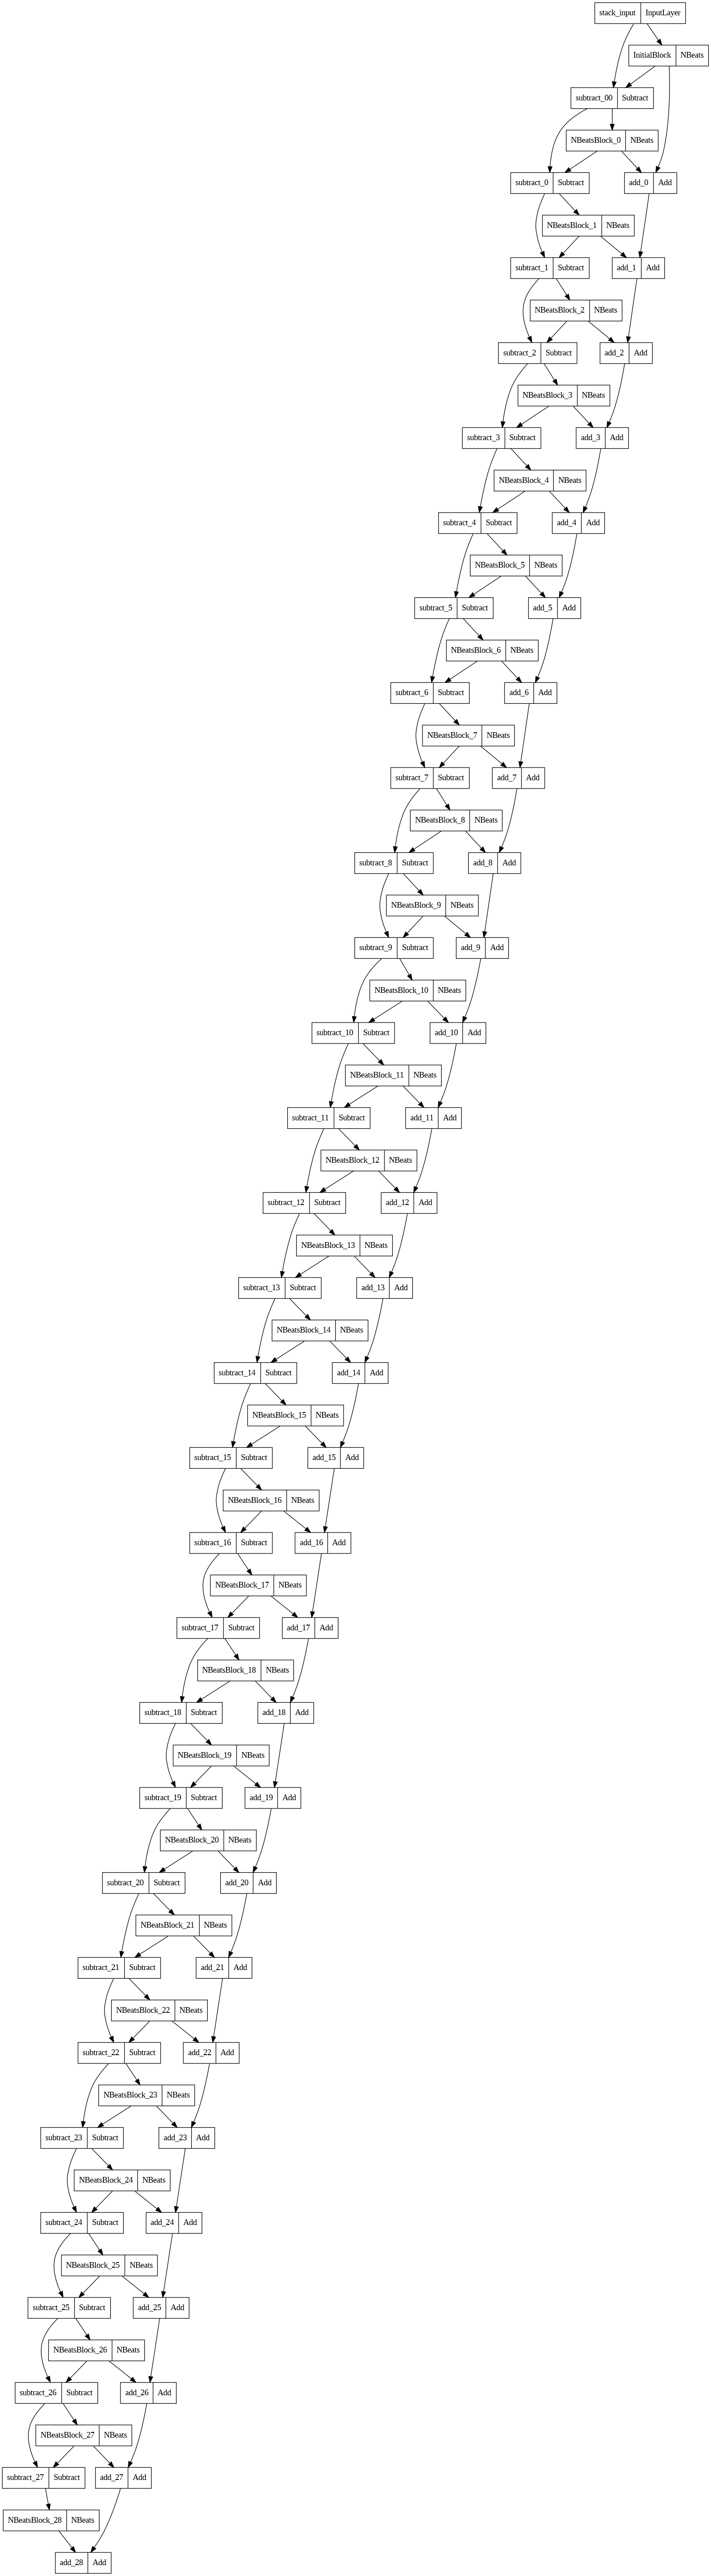

In [ ]:
tf.keras.utils.plot_model(model_7)

**NOW WE CREATE OUR ENSEMBLE MODEL**

In [ ]:
def ensemble_function(horizon=HORIZON,
                        train_data=train_dataset_prefetch,
                        test_data=test_dataset_prefetch,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  ensemble_models = []

  for i in range(num_iter):
    for loss_f in loss_fns:
      model_8=tf.keras.Sequential([
          tf.keras.layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          tf.keras.layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          tf.keras.layers.Dense(HORIZON)
      ])

      model_8.compile(loss=loss_f,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      model_8.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      ensemble_models.append(model_8)


  return ensemble_models


In [ ]:
ensemble_model = ensemble_function(num_epochs=1000,num_iter=5)


Epoch 913: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 235: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 335: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 116: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 233: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 333: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 344: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 444: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 768: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 868: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 118: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 498: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 880: ReduceLROnPlateau reducing l

In [ ]:
def ensemble_preds_func(ensemble_model,data):
    ensemble_preds = []
    for model in ensemble_model:
      preds = model.predict(data)
      ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_pred = ensemble_preds_func(ensemble_model,test_dataset_prefetch)

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 39ms/step


In [ ]:
ensemble_pred

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8797.034,  8760.681,  9030.196, ..., 49893.027, 48396.598,
        46385.984],
       [ 8797.192,  8750.153,  8972.447, ..., 50304.324, 48498.22 ,
        46115.305],
       [ 8807.906,  8796.86 ,  9061.022, ..., 49992.504, 48561.996,
        45660.26 ],
       ...,
       [ 8755.247,  8779.714,  9069.865, ..., 49802.61 , 48953.14 ,
        46358.062],
       [ 8863.101,  8746.063,  9002.222, ..., 49868.96 , 48628.863,
        45713.605],
       [ 8811.44 ,  8824.783,  9074.766, ..., 50413.223, 47489.76 ,
        45439.664]], dtype=float32)>

In [ ]:
ensemble_results = calculate_error_updated(y_test,ensemble_pred)
ensemble_results

{'mae': 580.44086,
 'mse': 1178556.8,
 'rmse': 1085.5795,
 'mape': 2.642843,
 'mase': 1.0196738}

In [ ]:
ensemble_results_2 = calculate_error_updated(y_test,tf.reduce_mean(ensemble_pred,axis=0))
ensemble_results_2

{'mae': 572.3258,
 'mse': 1149954.6,
 'rmse': 1072.3594,
 'mape': 2.591411,
 'mase': 1.005418}

**FINDING UPPER AND LOWER BOUNDS**

In [ ]:
def upper_bound(preds):
  std = tf.math.reduce_std(preds,axis=0)
  interval = 1.96*std

  preds_mean = tf.reduce_mean(preds,axis=0)

  lower,upper = preds_mean-interval,preds_mean+interval

  return lower,upper

In [ ]:
lower,upper = upper_bound(ensemble_pred)

lower,upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8735.183 ,  8707.203 ,  8970.818 ,  8629.538 ,  8681.796 ,
         8651.925 ,  8589.5625,  8403.836 ,  8394.722 ,  8455.519 ,
         8146.302 ,  8067.034 ,  7989.7666,  7564.869 ,  7215.8735,
         7259.4346,  7002.6143,  7122.552 ,  7053.065 ,  7428.2134,
         7312.201 ,  7679.5205,  7495.8057,  7336.6113,  7248.523 ,
         7255.8247,  7138.6484,  7300.055 ,  7448.7603,  7509.046 ,
         7519.375 ,  7282.1323,  7189.821 ,  7138.213 ,  7138.8647,
         7154.106 ,  7029.7593,  7047.872 ,  6827.7256,  6542.628 ,
         7238.615 ,  7034.426 ,  7058.9087,  7168.2793,  7161.979 ,
         7065.4697,  7152.1875,  7166.2334,  7133.3955,  7163.0806,
         7263.7617,  7351.573 ,  7219.658 ,  7129.822 ,  7112.272 ,
         6907.108 ,  7168.8516,  7262.466 ,  7325.293 ,  7633.771 ,
         8049.4165,  8065.0454,  7780.215 ,  8029.79  ,  8039.084 ,
         8101.1216,  8055.5894,  8677.644 ,  8809.172 ,  8708.6875,

*plotting our upper and lower bound*

In [ ]:
x_test.index[500:] , y_test[500:]

(DatetimeIndex(['2021-03-24', '2021-03-25', '2021-03-26', '2021-03-27',
                '2021-03-28', '2021-03-29', '2021-03-30', '2021-03-31',
                '2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
                '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
                '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12',
                '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
                '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
                '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
                '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
                '2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02',
                '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
                '2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10',
                '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
                '2021-05-15', '2021-05-16', '2021-05-17', '2021-

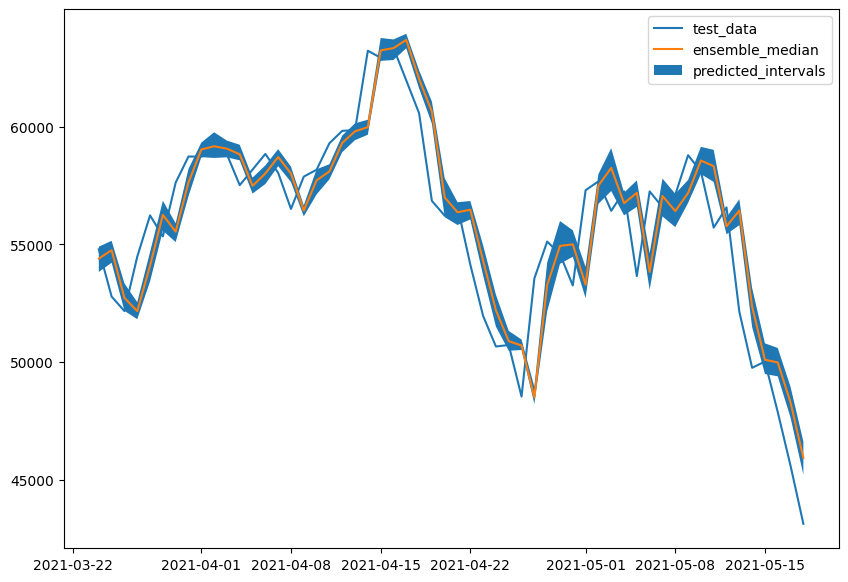

In [ ]:
ensemble_median = np.median(ensemble_pred,axis=0)
offset=500
plt.figure(figsize=(10,7))
plt.plot(x_test.index[offset:],y_test[offset:],label="test_data")
plt.plot(x_test.index[offset:],ensemble_median[offset:],label="ensemble_median")
plt.fill_between(x_test.index[offset:],(lower)[offset:],(upper)[offset:],label="predicted_intervals")
plt.legend()